<a href="https://colab.research.google.com/github/domanmat/OLS_airbnb/blob/main/3_airbnb_madrid_apts_no_hosts_OLS_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edycja biblioteki SweetViz
Jeśli chcesz skorzystać z SweetViz - poniżej kod do skutecznego zakomentowania linii w graph_numeric.py:
* za 1-szym razem uruchom tylko komórkę poniżej (bez komentarzy, ctrl+A & ctrl+/)
* zrób to tylko za 1-szym uruchomieniem i tylko tej komórki
* Runtime --> Restart session
* zakomentuj komórkę nr 2 (całą, tral+A & ctrl+/) i puść resztę



In [ ]:
# # Inne instalacje które warto wykonać tylko 1 raz - na początku:
# !pip install shap -qq
# !sudo apt-get install p7zip-full p7zip-rar -qq
# !pip install gdown -qq

# # Completely remove and reinstall SweetViz
# !pip uninstall sweetviz -y -qq
# !rm -rf /usr/local/lib/python3.12/dist-packages/sweetviz
# !pip install sweetviz -qq

# # Now apply the fix with a more robust approach
# file_path = '/usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py'

# with open(file_path, 'r') as f:
#     content = f.read()

# # Use string replacement to be precise
# old_section = """        gap_percent = config["Graphs"].getfloat("summary_graph_categorical_gap")

#         warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
#         self.hist_specs = axs.hist(plot_data, weights = normalizing_weights, bins=self.num_bins, \\
#                                    rwidth = (100.0 - gap_percent) / 100.0)
#         warnings.filterwarnings('once', category=np.VisibleDeprecationWarning)

#         bin_limits = self.hist_specs[1]"""

# new_section = """        gap_percent = config["Graphs"].getfloat("summary_graph_categorical_gap")

#         # warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
#         self.hist_specs = axs.hist(plot_data, weights = normalizing_weights, bins=self.num_bins, \\
#                                    rwidth = (100.0 - gap_percent) / 100.0)
#         # warnings.filterwarnings('once', category=np.VisibleDeprecationWarning)

#         bin_limits = self.hist_specs[1]"""

# content = content.replace(old_section, new_section)

# with open(file_path, 'w') as f:
#     f.write(content)

# print("✓ File fixed")

# # Verify
# print("\n=== Lines 69-76 ===")
# !sed -n '69,76p' /usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py

# # Clear cache
# !rm -rf /usr/local/lib/python3.12/dist-packages/sweetviz/__pycache__
# !find /usr/local/lib/python3.12/dist-packages/sweetviz -name "*.pyc" -delete

# print("\n✓ IMPORTANT: Restart runtime now (Runtime → Restart runtime)")

#Stowarzyszenie „Mieszkalnik” rozważa agresywną kampanię inwestycyjną w jednym z europejskich miast, ale potrzebuje Twojej wskazówki, od czego zacząć!

Kontekst: „Mieszkalnik”, stowarzyszenie właścicieli nieruchomości, rozważa agresywną kampanię inwestycyjną w jednym z europejskich miast.

Stowarzyszenie chce wybrać miasto, kierując się dobrą znajomością czynników wpływających na ceny najmu i umiejętnością prognozowania wyników najmu pozyskanych inwestycji.

Cel:
* opracowanie raportu na temat kształtowania się cen najmu Airbnb w wybranych miastach (wykorzystanie technik uczenia maszynowego)
* **rekomendacja miast**, w których Mieszkalnik może rozpocząć inwestycję jako pierwszy (założenie poziomu cen nieruchomości, rozważenie, jakie aspekty podniesienia cen najmu są najlepsze)
* przygotowanie się do przewidywania wyników najmu danej nieruchomości przez Dyrektora ds. Inwestycji Mieszkalnik.

**Odbiorcy:** Rada dyrektorów Mieszkalnik

Źródło danych: http://insideairbnb.com/get-the-data.html



**Zadania programisty:**
* Przygotuj dane (dla 2 miast)
* Załaduj dane do preferowanego narzędzia
* Wykorzystaj model regresji liniowej
* Wykorzystaj modele XGBoost + XAI
* Przekaż wyniki w sposób czytelny reszcie zespołu



Otrzymuje 3780 dolarów za czynsz w wysokości 3800 dolarów – grozi eksmisją
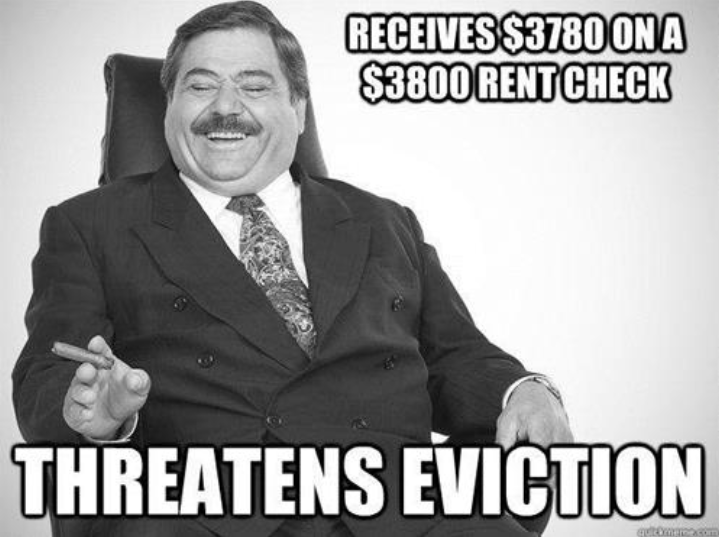


# What shapes Berlin AirBnB prices ?


## Import and load packages

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path
import xgboost
import shap

In [ ]:
sns.set_style("whitegrid")

## Airbnb and Airbnb Open Data

**Airbnb** is a company that provides a platform for people to list, discover, and book accommodations around the world. As part of its commitment to transparency and open data, Airbnb has made some of its data available for public use.

The **Airbnb Open Data** initiative provides access to a variety of datasets related to Airbnb's business and the broader hospitality industry. These datasets are made available under an open data license, which allows anyone to access, use, and share the data for any purpose.

The Airbnb Open Data initiative includes a range of datasets, including:

* **Listings data**: This dataset includes information about properties listed on Airbnb, including the location, price, availability, and amenities of each property.

* **Reviews data**: This dataset includes reviews and ratings left by guests who have stayed at Airbnb properties.

* **Calendar data**: This dataset includes availability information for Airbnb properties, including dates when a property is booked or available for booking.

* **Demographic data**: This dataset includes information about the demographics of Airbnb users, including age, gender, and location.

* **Host data**: This dataset includes information about Airbnb hosts, including the properties they own or manage and the number of reviews they have received.

The Airbnb Open Data initiative is intended to help researchers, policymakers, and others better understand the hospitality industry and the impact of Airbnb on communities around the world. It is also intended to encourage the development of new tools, applications, and research that can help Airbnb and other companies improve their services and better meet the needs of their users.

Data is available here http://insideairbnb.com/get-the-data

In this notebook we will focus on **Listings data**  

**Listings data** is a dataset that includes information about properties listed on Airbnb. This dataset includes details about the
* location,
* price,
* availability, and
* amenities of each property.

Here are some examples of the types of information that might be included in the listings data:

* **Property type**: Is the property a private room, shared room, or entire home/apartment?

* **Location**: Where is the property located (e.g., city, state, country)?

* **Price**: How much does it cost to stay at the property?

* **Availability**: When is the property available for booking?

* **Amenities**: What amenities are available at the property (e.g., WiFi, laundry facilities, kitchen)?

* **Photos**: What does the property look like (e.g., interior, exterior)?

Listings data can be useful for understanding the types of properties that are available on Airbnb, as well as the prices and amenities offered. It can also be used to analyze trends in the hospitality industry and understand the demand for different types of accommodations. For example, researchers might use listings data to study the impact of Airbnb on the housing market in a particular city, or to **understand the factors that influence the popularity of different types of properties**.

## Get data

###Download

In [ ]:
# download data for Prague
import gdown
url = 'https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2025-09-14/data/listings.csv.gz'

output = "listings_Madrid.gz"
gdown.download(url, output)

Downloading...
From: https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2025-09-14/data/listings.csv.gz
To: /content/listings_Madrid.gz
100%|██████████| 12.3M/12.3M [00:00<00:00, 33.2MB/s]


'listings_Madrid.gz'

In [ ]:
!ls -lah

total 12M
drwxr-xr-x 1 root root 4.0K Jan 14 21:31 .
drwxr-xr-x 1 root root 4.0K Jan 14 21:26 ..
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
-rw-r--r-- 1 root root  12M Jan 14 21:31 listings_Madrid.gz
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Extract files

In [ ]:
# # # Install libraries to unzip all
# !sudo apt-get install p7zip-full p7zip-rar -qq
# Unrar rar file
!7z x {output} -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 12322661 bytes (12 MiB)

Extracting archive: listings_Madrid.gz
--
Path = listings_Madrid.gz
Type = gzip
Headers Size = 23

  0% - listings.csv                    14% - listings.csv                    25% - listings.csv                    38% - listings.csv                    48% - listings.csv                    56% - listings.csv                    66% - listings.csv                    80% - listings.csv                   

In [ ]:
!ls -lah

total 62M
drwxr-xr-x 1 root root 4.0K Jan 14 21:31 .
drwxr-xr-x 1 root root 4.0K Jan 14 21:26 ..
drwxr-xr-x 4 root root 4.0K Dec 11 14:34 .config
-rw-r--r-- 1 root root  50M Oct 25 23:50 listings.csv
-rw-r--r-- 1 root root  12M Jan 14 21:31 listings_Madrid.gz
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


### Read data

In [ ]:
data_raw = pd.read_csv('listings.csv')

In [ ]:
# Print data info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25000 non-null  int64  
 1   listing_url                                   25000 non-null  object 
 2   scrape_id                                     25000 non-null  int64  
 3   last_scraped                                  25000 non-null  object 
 4   source                                        25000 non-null  object 
 5   name                                          25000 non-null  object 
 6   description                                   24130 non-null  object 
 7   neighborhood_overview                         10586 non-null  object 
 8   picture_url                                   24999 non-null  object 
 9   host_id                                       25000 non-null 

### Raw Data

In [ ]:
# Pokaż wszystkie kolumny i 10 wierszy
pd.set_option('display.max_columns', None)     # Wszystkie kolumny
pd.set_option('display.width', 1000)           # Szerokość wyświetlania
pd.set_option('display.max_colwidth', 50)      # Max szerokość pojedynczej kolumny
pd.set_option('display.expand_frame_repr', False)  # Nie łam DataFrame na wiele linii
pd.set_option('display.max_rows', None)  # Wszystkie wiersze
data_raw.head(100).T

0                                                  1                                                  2                                                  3                                                  4                                                  5                                                  6                                                  7                                                  8                                                  9                                                  10                                                 11                                                 12                                                 13                                                 14                                                 15                                                 16                                                 17                                                 18                                                 19                                                 20                                                 21                                                 22                                                 23                                                 24                                                 25                                                 26                                                 27                                                 28                                                 29                                                 30                                                 31                                                 32                                                 33                                                 34                                                 35                                                 36                                                 37                                                 38                                                 39                                                 40                                                 41                                                 42                                                 43                                                 44                                                 45                                                 46                                                 47                                                 48                                                 49                                                 50                                                 51                                                 52                                                 53                                                 54                                                 55                                                 56                                                 57                                                 58                                                 59                                                 60                                                 61                                                 62                                                 63                                                 64                                                 65                                                 66                                                 67                                                 68                                                 69                                                 70                                                 71                                                 72                                                 73                                                 74                                                 75                                                 76                                                 77                                                 78                    

In [ ]:
data_raw.head(10)

id                         listing_url       scrape_id last_scraped           source                                              name                                        description                              neighborhood_overview                                        picture_url  host_id                                  host_url        host_name  host_since  host_location                                         host_about host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count                host_verifications host_has_profile_pic host_identity_verified                       neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude                property_type        room_type  accommodates  bathrooms    bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0  21853  https://www.airbnb.com/rooms/21853  20250914152907   2025-09-15  previous scrape                              Bright and airy room  We have a quiet and sunny room with a good vie...  We live in a leafy neighbourhood with plenty o...  https://a0.muscache.com/pictures/68483181/87bc...    83531   https://www.airbnb.com/users/show/83531            Abdel  2010-02-21  Madrid, Spain  EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...       within a day               100%                  NaN                 f  https://a0.muscache.com/im/users/83531/profile...  https://a0.muscache.com/im/users/83531/profile...             Aluche                  2.0                        2.0                ['email', 'phone']                    t                      t                       Madrid, Spain               Cármenes                       Latina  40.40381   -3.74130  Private room in rental unit     Private room             1        NaN            1 bath       NaN   NaN  ["First aid kit", "Hair dryer", "Bed linens", ...      NaN               4              40                     4.0                     4.0                    40.0                    40.0                     4.0                    40.0               NaN                t                0                0                0               198            2025-09-15                 33                      0                       0                 0                     0                          0                      NaN   2014-10-10  2018-07-15                  4.58                    4.72                       4.56                   4.75                         4.82                    4.21                 4.67      NaN                f                               2                                            0                                             2                                            0               0.25
1  30320  https://www.airbnb.com/rooms/30320  20250914152907   2025-09-15      city scrape                             Apartamentos Dana Sol                                                NaN   

In [ ]:
print(data_raw.shape)
data_raw.head()

(25000, 79)


id                         listing_url       scrape_id last_scraped           source                                          name                                        description                              neighborhood_overview                                        picture_url  host_id                                  host_url        host_name  host_since  host_location                                         host_about host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count  host_verifications host_has_profile_pic host_identity_verified  neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude                property_type        room_type  accommodates  bathrooms    bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0  21853  https://www.airbnb.com/rooms/21853  20250914152907   2025-09-15  previous scrape                          Bright and airy room  We have a quiet and sunny room with a good vie...  We live in a leafy neighbourhood with plenty o...  https://a0.muscache.com/pictures/68483181/87bc...    83531   https://www.airbnb.com/users/show/83531            Abdel  2010-02-21  Madrid, Spain  EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...       within a day               100%                  NaN                 f  https://a0.muscache.com/im/users/83531/profile...  https://a0.muscache.com/im/users/83531/profile...             Aluche                  2.0                        2.0  ['email', 'phone']                    t                      t  Madrid, Spain               Cármenes                       Latina  40.40381   -3.74130  Private room in rental unit     Private room             1        NaN            1 bath       NaN   NaN  ["First aid kit", "Hair dryer", "Bed linens", ...      NaN               4              40                     4.0                     4.0                    40.0                    40.0                     4.0                    40.0               NaN                t                0                0                0               198            2025-09-15                 33                      0                       0                 0                     0                          0                      NaN   2014-10-10  2018-07-15                  4.58                    4.72                       4.56                   4.75                         4.82                    4.21                 4.67     NaN                f                               2                                            0                                             2                                            0               0.25
1  30320  https://www.airbnb.com/rooms/30320  20250914152907   2025-09-15      city scrape                         Apartamentos Dana Sol                                                NaN                                                NaN  https://a0.muscache.com/pictures/3

### Filter data rows

In [ ]:
# Usuwa wiersze niebędące domami/apartamentami
data_raw = data_raw[data_raw['room_type'] == 'Entire home/apt']

### Filter data columns

In [ ]:
# Usuń wszystkie kolumny zawierające 'host' (case-insensitive)
columns_to_drop = [col for col in data_raw.columns if 'host' in col.lower()]
data_raw = data_raw.drop(columns=columns_to_drop)

print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'host'")
print(f"Usunięte kolumny: {columns_to_drop}")

Usunięto 22 kolumn zawierających 'host'
Usunięte kolumny: ['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


In [ ]:
# Usuń wszystkie kolumny zawierające 'review' (case-insensitive)
columns_to_drop = [col for col in data_raw.columns if 'review' in col.lower()]
data_raw = data_raw.drop(columns=columns_to_drop)

print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'review'")
print(f"Usunięte kolumny: {columns_to_drop}")

Usunięto 14 kolumn zawierających 'review'
Usunięte kolumny: ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [ ]:
# Usuń wszystkie kolumny zawierające 'review' (case-insensitive)
columns_to_drop = [col for col in data_raw.columns if 'availability' in col.lower()]
data_raw = data_raw.drop(columns=columns_to_drop)

print(f"Usunięto {len(columns_to_drop)} kolumn zawierających 'availability'")
print(f"Usunięte kolumny: {columns_to_drop}")

Usunięto 6 kolumn zawierających 'availability'
Usunięte kolumny: ['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'availability_eoy']


# Analysis and Data preparation (EDA with SweetViz)

### Report

In [ ]:
# # Verify the changes
# !ls /usr/local/lib/python3.12/dist-packages/sweetviz/
# !sed -n '69,76p' /usr/local/lib/python3.12/dist-packages/sweetviz/graph_numeric.py

# # Run sweet wiz analysis
# import sweetviz as sv
# import warnings
# warnings.filterwarnings('ignore')

# my_report = sv.analyze(data_raw, pairwise_analysis="off")
# my_report.show_notebook()

In [ ]:
data_raw.head(10)

id                         listing_url       scrape_id last_scraped           source                                               name                                        description                              neighborhood_overview                                        picture_url                       neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated calendar_last_scraped  estimated_occupancy_l365d  estimated_revenue_l365d  license instant_bookable
1   30320  https://www.airbnb.com/rooms/30320  20250914152907   2025-09-15      city scrape                              Apartamentos Dana Sol                                                NaN                                                NaN  https://a0.muscache.com/pictures/336868/f67409...                                 NaN                    Sol                       Centro  40.41476   -3.70418  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   2.0  ["TV with standard cable", "Elevator", "Air co...  $157.00               5              50                     1.0                     7.0                    50.0                    50.0                     5.0                    50.0               NaN            2025-09-15                         10                   1570.0      NaN                t
2   30959  https://www.airbnb.com/rooms/30959  20250914152907   2025-09-15  previous scrape                    Beautiful loft in Madrid Center  Beautiful Loft 60m2 size just in the historica...                                                NaN  https://a0.muscache.com/pictures/78173471/835e...                                 NaN            Embajadores                       Centro  40.41259   -3.70105         Entire loft  Entire home/apt             2        NaN         1 bath       1.0   NaN  ["TV with standard cable", "Elevator", "Pets a...      NaN               3             730                     3.0                     3.0                   730.0                   730.0                     3.0                   730.0               NaN            2025-09-15                          0                      NaN      NaN                f
3   40916  https://www.airbnb.com/rooms/40916  20250914152907   2025-09-15      city scrape                        Apartasol Apartamentos Dana                                                NaN                                                NaN  https://a0.muscache.com/pictures/hosting/Hosti...                                 NaN            Universidad                       Centro  40.42247   -3.70577  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   3.0  ["Elevator", "Wifi", "Air conditioning", "TV",...  $143.00               5              50                     2.0                     5.0                    50.0                    50.0                     5.0                    50.0               NaN            2025-09-15                         40                   5720.0      NaN                t
5   70059  https://www.airbnb.com/rooms/70059  20250914152907   2025-09-15  previous scrape                      Tu hogar en centro de Madrid.  Very nice, cozy and bright, right in the cente...  The location of this apartment is ideal for wa...  https://a0.muscache.com/pictures/6479679/b14b9...  Madrid, Community of Madrid, Spain            Universidad                       Centro  40.42381   -3.71038  Entire rental unit  Entire home/apt             2        NaN         1 bath       1.0   NaN  ["Private patio or balcony", "Hair dryer", "Be...      NaN               7             365          

# Prepare the target varaible = price
(ma tylko 65% kompletności danych)

### Process data

In [ ]:
# Drop columns with NaNs greater than the threshold
# data = data_raw.dropna(axis=1, thresh= 0.8*data_raw.shape[0]).copy()
data_price = data_raw.dropna(subset=['price']).copy()
# data = data_price.dropna(axis=1, thresh=0.75*data_price.shape[0])
data = data_price.dropna(axis=1, thresh=0.8*data_price.shape[0])
print(len(data))

print(data.shape)
print(data.head(10))

13648
(13648, 33)
        id                          listing_url       scrape_id last_scraped       source                                               name                                        description                                        picture_url neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_last_scraped  estimated_occupancy_l365d  estimated_revenue_l365d instant_bookable
1    30320   https://www.airbnb.com/rooms/30320  20250914152907   2025-09-15  city scrape                              Apartamentos Dana Sol                                                NaN  https://a0.muscache.com/pictures/336868/f67409...    

### Cloumn names list

In [ ]:
data.head(100).T

1                                                  3                                                  6                                                  7                                                  8                                                  11                                                 21                                                 22                                                 24                                                 26                                                 27                                                 28                                                 29                                                 30                                                 31                                                 32                                                 33                                                 36                                                 38                                                 39                                                 40                                                 41                                                 42                                                 44                                                 46                                                 47                                                 48                                                 49                                                 51                                                 52                                                 54                                                 55                                                 56                                                 58                                                 60                                                 62                                                 63                                                 66                                                 67                                                 70                                                 74                                                 79                                                 81                                                 83                                                 89                                                 95                                                 96                                                 99                                                 100                                                101                                                102                                                103                                                104                                                106                                                107                                                109                                                110                                                111                                                112                                                114                                                115                                                118                                                119                                                120                                                121                                                123                                                124                                                128                                                129                                                130                                                132                                                133                                                135                                                139                                                141                                                142                                                144                                                146                                                147                   

In [ ]:
print(f"Original data shape: {data_raw.shape}")
print(f"Data shape after dropping columns with 'price' NaNs: {data_price.shape}")
print(f"Data shape after dropping columns with NaNs: {data.shape}")

Original data shape: (16692, 37)
Data shape after dropping columns with 'price' NaNs: (13648, 37)
Data shape after dropping columns with NaNs: (13648, 33)


In [ ]:
data.price.head()
# Oups, our price is a string, it has to be cleaned!
# need to clean and convert it to float

1    $157.00
3    $143.00
6    $116.00
7     $79.00
8    $300.00
Name: price, dtype: object

### Cast the target (price) to float

Cast price column to float (replace "$", "," and cast to "float")

**Price - kwoty podane w EURO!**

In [ ]:
# Process
data.price.str.replace("$","").str.replace(",","").astype("float").describe()

# Cast price as float
data.price = data.price.apply(lambda x: x.replace("$", ""))
data.price = data.price.apply(lambda x: x.replace(",", ""))
data.price = data.price.astype("float")

# # Przekształć liniowo: price/100*4.11 - kurs 100 koron = 4,11 eur
# data.price = data.price / 100 * 4.11

data.price.describe()

/tmp/ipython-input-1595528674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price = data.price.apply(lambda x: x.replace("$", ""))
/tmp/ipython-input-1595528674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price = data.price.apply(lambda x: x.replace(",", ""))
/tmp/ipython-input-1595528674.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

count    13648.000000
mean       184.980876
std        564.375520
min          9.000000
25%         96.000000
50%        129.000000
75%        183.000000
max      25654.000000
Name: price, dtype: float64

### Outlier deletion

LIKWIDACJA OUTLIERÓW, po co?

Słabo modelują dane.

Odcięcie 99, 98, 95 percentyla - ok.
Podobnie odcięcie 1,2,5 percentyla.

In [ ]:
data.price.describe()

count    13648.000000
mean       184.980876
std        564.375520
min          9.000000
25%         96.000000
50%        129.000000
75%        183.000000
max      25654.000000
Name: price, dtype: float64

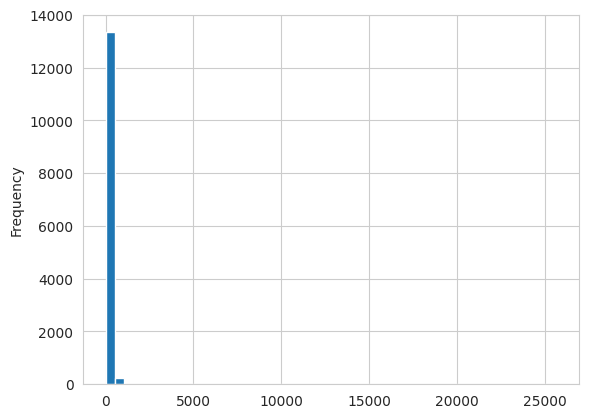

In [ ]:
# Mhm, we have outliers which seem to be to-be-deleted-errors
data.price.plot.hist(bins=50)
plt.show()

In [ ]:
# Getting rid of outliers
threshold_top=(np.percentile(data.price, 95))
threshold_bottom=(np.percentile(data.price, 5))
print("95% properties have a price lower than {0: .2f}".format(threshold_top))
print("95% properties have a price higher than {0: .2f}".format(threshold_bottom))
data_cut = data[(data.price <= threshold_top) & (data.price > threshold_bottom)]
all_data=data
data = data_cut
print(all_data.shape, data.shape)

95% properties have a price lower than  368.65
95% properties have a price higher than  65.00
(13648, 33) (12278, 33)


<Axes: ylabel='Frequency'>

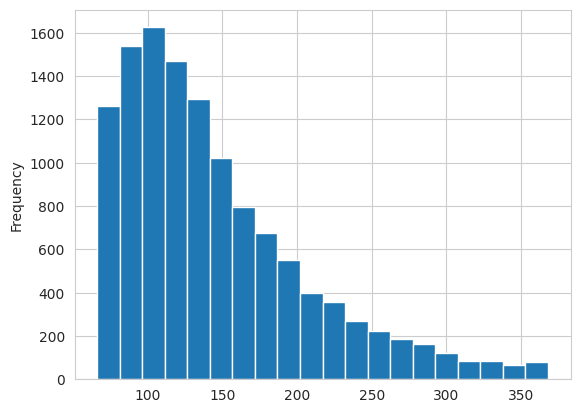

In [ ]:
all_data.query(f'price > {threshold_bottom} & price < {threshold_top}').price.plot.hist(bins=20)

# DANE DO MODELU - X


## Utworzenie zbioru treningowego i testowego - nie używane

### Stratyfikacja

In [ ]:
# Percentyle dla stratyfikacji
percentiles = np.percentile(data['price'], [25, 50, 75])
print(f"Percentyle: {percentiles}")

# Tworzy kategorie na podstawie percentyli
data['price_category'] = pd.cut(data['price'],
                                bins=[0] + list(percentiles) + [data['price'].max()],
                                labels=['Q1', 'Q2', 'Q3', 'Q4'],
                                include_lowest=True)

data['price_category'].value_counts()

Percentyle: [ 99. 129. 176.]


/tmp/ipython-input-509507388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_category'] = pd.cut(data['price'],


price_category
Q1    3143
Q3    3068
Q4    3038
Q2    3029
Name: count, dtype: int64

In [ ]:
# Wybieramy model ze stratyfikacją
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.price,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=data['price_category'])

/tmp/ipython-input-2788691802.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = df.groupby('category', group_keys=False).apply(


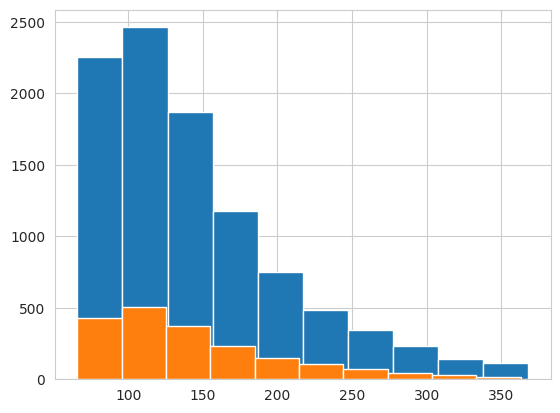

In [ ]:
def percentile_bins(series, n_bins):
    """Zwraca granice n_bins równych percentyli"""
    bins = np.percentile(series, np.linspace(0, 100, n_bins + 1))
    categories = pd.cut(series, bins=bins, labels=False, include_lowest=True)
    return bins, categories

# Użycie:
bins, categories = percentile_bins(y_train, 10)

df = pd.DataFrame({'values': y_train, 'category': categories})

sampled = df.groupby('category', group_keys=False).apply(
        lambda x: x.sample(frac=0.2, random_state=42)
    )
plt.hist(y_train)
plt.hist(sampled['values'], bins=10)
plt.show()

In [ ]:
# Dla porównania - dane bez stratyfikacji
from sklearn.model_selection import train_test_split
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(data,
                                                    data.price,
                                                    test_size=0.20,
                                                    random_state=42)

(<Axes: >, <Axes: >, <Axes: >)

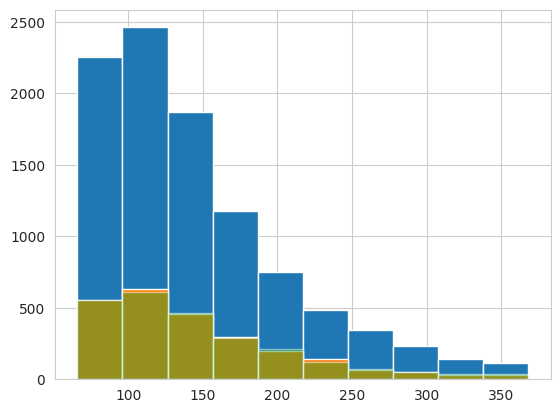

In [ ]:
# porównanie danych bez stratyfikacji i ze stratyfikacją
y_train.hist(), y_test.hist(), y_test_no.hist(alpha=0.5)

## Braki
Zastąpienie brakujących danych:
* dane numeryczne - zastąpienie średnią
* dane kategoryczne - zastąpienie najczęściej występującą



In [ ]:
# from sklearn.impute import SimpleImputer

# numeric_cols     = X_train.select_dtypes(include=['number']).columns
# categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# numeric_imputer     = SimpleImputer(strategy='mean')
# categorical_imputer = SimpleImputer(strategy='most_frequent')

# # Apply imputer to numeric columns
# X_train[numeric_cols]     = numeric_imputer.fit_transform(X_train[numeric_cols])
# X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# # Apply imputer to numeric columns
# X_test[numeric_cols]     = numeric_imputer.transform(X_test[numeric_cols])
# X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])


In [ ]:
# X_train.shape, X_test.shape
# # ((5849, 39), (1463, 39)) przy zastępowaniu braków

In [ ]:
# Usuń wiersze z brakującymi danymi
X_train = X_train.dropna()
X_test = X_test.dropna()
X = data.dropna()
data = data.dropna()

# Opcjonalnie - wyświetl informacje o usuniętych wierszach
print(f"Rozmiar X_train po usunięciu braków: {X_train.shape}")
print(f"Rozmiar X_test po usunięciu braków: {X_test.shape}")
print(f"Rozmiar X po usunięciu braków: {X.shape}")
print(f"Rozmiar data po usunięciu braków: {X.shape}")

Rozmiar X_train po usunięciu braków: (9542, 34)
Rozmiar X_test po usunięciu braków: (2382, 34)
Rozmiar X po usunięciu braków: (11924, 34)
Rozmiar data po usunięciu braków: (11924, 34)


## Create New Features


### New Variable - Lokalizacja względem innych Airbnb
Średnia z jednej i drugiej współrzędnej powinna dać centrum.

Ale nie musi, może lepiej dać centrum Berlina?

In [ ]:
data = data.copy()

# data['lat_dist_mean']  = data['latitude'].apply(lambda x: (x-np.mean( data['latitude']))**2)
# data['lon_dist_mean']  = data['longitude'].apply(lambda x: (x-np.mean( data['longitude']))**2)

lat_mean = data['latitude'].mean()
lon_mean = data['longitude'].mean()

data['lat_dist_mean'] = (data['latitude'] - lat_mean) ** 2
data['lon_dist_mean'] = (data['longitude'] - lon_mean) ** 2
data['lat_dist_mean_sqrt'] = np.sqrt((data['latitude'] - lat_mean) ** 2)
data['lon_dist_mean_sqrt'] = np.sqrt((data['longitude'] - lon_mean) ** 2)


### New Variable - Distance from city centre
odległość od średniej z odległości ze współrzędnych

to nie jest odległość od centrum berlina - odległość od centrum powinna być lepsza - zmienić

In [ ]:
# Punkt referencyjny - Madryt - Plaza Mayor
ref_lat = 40.4155167525022
ref_lon = -3.7074173774808172

# Obliczanie kwadratu odległości od punktu referencyjnego
data['lat_dist_centre'] = (data['latitude'] - ref_lat) ** 2
data['lon_dist_centre'] = (data['longitude'] - ref_lon) ** 2

# Opcjonalnie: rzeczywista odległość euklidesowa od centrum
data['dist_from_center'] = np.sqrt(data['lat_dist_centre'] + data['lon_dist_centre'])

### New Variables - sqrts and sqrs

In [ ]:
# Parametry pierwiastkowe - zapobiegają szybkiemu wzrostowi cen
data['dist_from_center_sqrt'] = np.sqrt(data['dist_from_center'])
data['dist_from_center_square'] = np.square(data['dist_from_center'])
data['bedrooms_sqrt'] = np.sqrt(data['bedrooms'])
data['bathrooms_sqrt'] = np.sqrt(data['bathrooms'])
data['accommodates_sqrt'] = np.sqrt(data['accommodates'])

### New Variable - Neighbourhood

one (???) encoding - kodowanie do zmiennej numerycznej, jak to się robi

In [ ]:
top_n = 20
data['neighbourhood_cleansed'].value_counts().nlargest(top_n).to_dict()

{'Embajadores': 1354,
 'Universidad': 1154,
 'Palacio': 1081,
 'Sol': 729,
 'Justicia': 676,
 'Cortes': 589,
 'Trafalgar': 235,
 'Goya': 225,
 'Guindalera': 219,
 'Cuatro Caminos': 219,
 'Palos de Moguer': 199,
 'Recoletos': 185,
 'Ibiza': 144,
 'Valdeacederas': 144,
 'Arapiles': 142,
 'Castillejos': 142,
 'Lista': 131,
 'Castellana': 129,
 'Argüelles': 129,
 'San Diego': 122}

In [ ]:
top_nbhds = list(data['neighbourhood_cleansed'].value_counts().nlargest(top_n).index)
data['neighbourhood_cleansed_map'] = data['neighbourhood_cleansed'].apply(lambda x: x if x in top_nbhds else 'other')

stats = data.groupby('neighbourhood_cleansed_map')['price'].agg([
    'count',
    'mean',
    'median'
]).sort_values('mean', ascending=False)

# Dodaj wiersz "ALL" na końcu
stats.loc['─' * 20] = ['', '', '']  # separator
stats.loc['ALL (Total)'] = [
    data['price'].count(),
    data['price'].mean(),
    data['price'].median()
]

stats['mean'] = stats['mean'].round(2)
stats


count        mean median
neighbourhood_cleansed_map                            
Recoletos                       185   187.07027  172.0
Castellana                      129  185.364341  176.0
Lista                           131  179.083969  166.0
Goya                            225      173.44  160.0
Sol                             729   172.14952  158.0
Argüelles                       129  167.689922  153.0
Justicia                        676  165.732249  147.0
Ibiza                           144    162.5625  150.0
Trafalgar                       235  162.548936  157.0
Cortes                          589  160.466893  144.0
Palacio                        1081  159.601295  143.0
Universidad                    1154  151.681976  139.0
Arapiles                        142  142.112676  133.5
Cuatro Caminos                  219  138.182648  130.0
Embajadores                    1354  137.948301  119.5
Guindalera                      219  136.493151  120.0
Palos de Moguer                 199  136.075377  122.0
Castillejos                     142  132.852113  118.5
other                          3976  125.818662  111.0
San Diego                       122  118.885246  106.5
Valdeacederas                   144  115.027778  104.5
────────────────────                                  
ALL (Total)                 11924.0  144.938276  129.0

In [ ]:
data[data['neighbourhood_cleansed_map'] != 'other']['neighbourhood_cleansed_map'].head(10)


6     Universidad
7     Universidad
8     Embajadores
11    Embajadores
21         Cortes
28            Sol
31    Universidad
33        Palacio
38       Justicia
39    Universidad
Name: neighbourhood_cleansed_map, dtype: object

### Parsowanie amenities

In [ ]:
import ast
from collections import Counter

data_amenities = data.copy()

# Jeśli wartości są stringami reprezentującymi listy
data_amenities['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)

# Rozwiń wszystkie amenities do pojedynczych wierszy
amenities_expanded = data_amenities.explode('amenities_parsed')

# Podstawowe statystyki
print("Najczęstsze udogodnienia:")
print(amenities_expanded['amenities_parsed'].value_counts().head(10))

Najczęstsze udogodnienia:
amenities_parsed
Kitchen                  11520
Wifi                     11100
Hot water                10103
Hair dryer                9730
Dishes and silverware     9667
Iron                      9585
Bed linens                9494
Microwave                 9359
Refrigerator              9156
Hangers                   8813
Name: count, dtype: int64


In [ ]:
amenity_counts = Counter()
for amenities in data_amenities['amenities_parsed']:
    amenity_counts.update(amenities)

# Całkowita liczba wierszy
total_rows = len(data_amenities)

# Filtrowanie amenities występujących w >10% wierszy
amenities_used = [
    amenity for amenity, count in amenity_counts.items()
    if (count / total_rows) > 0.10
]

# Wyświetlenie wyników
print(f"Liczba amenities występujących w >10% wierszy: {len(amenities_used)}")
print(f"\nLista amenities_used:")
for amenity in sorted(amenities_used):
    count = amenity_counts[amenity]
    percentage = (count / total_rows) * 100
    print(f"  {amenity}: {count}/{total_rows} ({percentage:.1f}%)")

Liczba amenities występujących w >10% wierszy: 65

Lista amenities_used:
  AC - split type ductless system: 1678/11924 (14.1%)
  Air conditioning: 7997/11924 (67.1%)
  Bathtub: 1205/11924 (10.1%)
  Bed linens: 9494/11924 (79.6%)
  Blender: 1546/11924 (13.0%)
  Body soap: 5050/11924 (42.4%)
  Carbon monoxide alarm: 2051/11924 (17.2%)
  City skyline view: 1343/11924 (11.3%)
  Cleaning products: 4864/11924 (40.8%)
  Clothing storage: 2704/11924 (22.7%)
  Clothing storage: closet: 2427/11924 (20.4%)
  Coffee: 2491/11924 (20.9%)
  Coffee maker: 6272/11924 (52.6%)
  Coffee maker: Nespresso: 1655/11924 (13.9%)
  Conditioner: 1199/11924 (10.1%)
  Cooking basics: 8749/11924 (73.4%)
  Crib: 2093/11924 (17.6%)
  Dedicated workspace: 6185/11924 (51.9%)
  Dining table: 5342/11924 (44.8%)
  Dishes and silverware: 9667/11924 (81.1%)
  Dishwasher: 5766/11924 (48.4%)
  Dryer: 1225/11924 (10.3%)
  Drying rack for clothing: 5188/11924 (43.5%)
  Elevator: 5844/11924 (49.0%)
  Essentials: 8452/11924 (70.9%

### New Variable - Amenities - udogodnienia
lista tego, co się znajduje w każdym mieszkaniu, lista która jest dość długa.


In [ ]:
# ### OLD
# # Create some features
# data['is_wifi']        = data['amenities'].apply(lambda x: 'wifi' in x.lower())*1
# data['is_tv']          = data['amenities'].apply(lambda x: 'tv' in x.lower())*1
# data['is_essentials']  = data['amenities'].apply(lambda x: 'essentials' in x.lower())*1
# data['n_amenities']    = data['amenities'].apply(lambda x: len(x.split(',')))

In [ ]:
data=data.copy()
data['n_amenities'] = data['amenities'].apply(lambda x: len(x.split(',')))

# Parsowanie kolumny amenities jeśli jeszcze nie jest listą
if data['amenities'].dtype == 'object' and isinstance(data['amenities'].iloc[0], str):
    import ast
    data['amenities_parsed'] = data['amenities'].apply(ast.literal_eval)
else:
    data['amenities_parsed'] = data['amenities']

# Tworzenie binarnych kolumn dla każdego amenity z listy amenities_used
for amenity in amenities_used:
    column_name = f"is_{amenity.lower().replace(' ', '_').replace('\u2019', '').replace('-', '_').replace(':', '').replace('/', '_').replace('-', '_').replace('–', '_')}"
    data[column_name] = data['amenities_parsed'].apply(
        lambda x: 1 if amenity in x else 0
    )

print(f"Dodano {len(amenities_used)} nowych kolumn binarnych")
data.head(3)

Dodano 65 nowych kolumn binarnych


id                         listing_url       scrape_id last_scraped       source                                              name                                        description                                        picture_url neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_last_scraped  estimated_occupancy_l365d  estimated_revenue_l365d instant_bookable price_category  lat_dist_mean  lon_dist_mean  lat_dist_mean_sqrt  lon_dist_mean_sqrt  lat_dist_centre  lon_dist_centre  dist_from_center  dist_from_center_sqrt  dist_from_center_square  bedrooms_sqrt  bathrooms_sqrt  accommodates_sqrt neighbourhood_cleansed_map  n_amenities                                   amenities_parsed  is_private_patio_or_balcony  is_hair_dryer  is_bed_linens  is_cooking_basics  is_wifi  is_dishes_and_silverware  is_microwave  is_freezer  is_laundromat_nearby  is_long_term_stays_allowed  is_hot_water  is_hangers  is_extra_pillows_and_blankets  is_coffee_maker  is_bathtub  is_dining_table  is_kitchen  is_free_washer___in_unit  is_drying_rack_for_clothing  is_city_skyline_view  is_essentials  is_dedicated_workspace  is_toaster  is_hot_water_kettle  is_refrigerator  is_heating  is_host_greets_you  is_wine_glasses  is_iron  is_dishwasher  is_paid_parking_off_premises  is_stove  is_clothing_storage_closet  is_patio_or_balcony  is_shampoo  is_air_conditioning  is_pets_allowed  is_luggage_dropoff_allowed  is_smoke_alarm  is_dryer  is_carbon_monoxide_alarm  is_self_check_in  is_oven  is_washer  is_cleaning_products  is_first_aid_kit  is_shower_gel  is_tv  is_room_darkening_shades  is_body_soap  is_lockbox  is_elevator  is_fire_extinguisher  is_private_entrance  is_ethernet_connection  is_heating___split_type_ductless_system  is_ac___split_type_ductless_system  is_clothing_storage  is_coffee  is_conditioner  is_crib  is_single_level_home  is_smart_lock  is_blender  is_coffee_maker_nespresso
6  70073  https://www.airbnb.com/rooms/70073  20250914152907   2025-09-15  city scrape              Adorable Apartment Malasaña-Gran Via  Beautiful apartment with spacious living room ...  https://a0.muscache.com/pictures/25829727/eedd...            Universidad                       Centro  40.42252   -3.70250  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   1.0  ["Electric stove", "Private patio or balcony",...  116.0              30             360                    30.0                    30.0                  1125.0                  1125.0                    30.0                  1125.0            2025-09-15                         60                   6960.0                f             Q2       0.000001       0.000068            0.001056            0.008237         0.000049         0.000024          0.008557               0.092505                 0.000073       1.000000             1.0           1.414214                Universidad           36  [Electric stove, Private patio or balcony, Cen...                            1              1              1                  1        1                         1             1           1                     1                           1             1           1                              1                1           1                1           1                         1                            1                     1              1                       1           1                    1                1           1                   1                1        1              1                             1         0                           0                    0           0                    0                0         

### New Variable - Property_type

In [ ]:
top_n = 6
data['property_type'].value_counts().nlargest(top_n).to_dict()

{'Entire rental unit': 10839,
 'Entire loft': 321,
 'Entire condo': 285,
 'Entire serviced apartment': 185,
 'Entire home': 168,
 'Room in aparthotel': 35}

In [ ]:
top_pr_type = list(data['property_type'].value_counts().nlargest(top_n).index)
data['property_type_map'] = data['property_type'].apply(lambda x: x if x in top_pr_type else 'other')
data['property_type_map'].head(3)

6    Entire rental unit
7    Entire rental unit
8    Entire rental unit
Name: property_type_map, dtype: object

In [ ]:
# data.replace({'host_is_superhost' : {'t' : 1, 'f' : 0}}, inplace=True)
data.replace({'instant_bookable' : {'t' : 1, 'f' : 0}}, inplace=True)

/tmp/ipython-input-41485973.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'instant_bookable' : {'t' : 1, 'f' : 0}}, inplace=True)


### Numerical columns

In [ ]:
# get all numeric - just string creation
all_num_feats = [x for x in data.dtypes[data.dtypes != 'object'].index if not ('id' in x)
and not ('url' in x) and not ('price' in x)
and not ('longitude' in x) and not ('latitude' in x) ]

# print numerical features
print(" \n + ".join(all_num_feats))

accommodates 
 + bathrooms 
 + bedrooms 
 + beds 
 + minimum_nights 
 + maximum_nights 
 + minimum_minimum_nights 
 + maximum_minimum_nights 
 + minimum_maximum_nights 
 + maximum_maximum_nights 
 + minimum_nights_avg_ntm 
 + maximum_nights_avg_ntm 
 + estimated_occupancy_l365d 
 + estimated_revenue_l365d 
 + instant_bookable 
 + lat_dist_mean 
 + lon_dist_mean 
 + lat_dist_mean_sqrt 
 + lon_dist_mean_sqrt 
 + lat_dist_centre 
 + lon_dist_centre 
 + dist_from_center 
 + dist_from_center_sqrt 
 + dist_from_center_square 
 + bedrooms_sqrt 
 + bathrooms_sqrt 
 + accommodates_sqrt 
 + n_amenities 
 + is_private_patio_or_balcony 
 + is_hair_dryer 
 + is_bed_linens 
 + is_cooking_basics 
 + is_wifi 
 + is_dishes_and_silverware 
 + is_microwave 
 + is_freezer 
 + is_laundromat_nearby 
 + is_long_term_stays_allowed 
 + is_hot_water 
 + is_hangers 
 + is_extra_pillows_and_blankets 
 + is_coffee_maker 
 + is_bathtub 
 + is_dining_table 
 + is_kitchen 
 + is_free_washer___in_unit 
 + is_drying_ra

### Categorical columns

In [ ]:
# get all categorical - just string creation
all_cat_feats = [x for x in data.dtypes[data.dtypes == 'object'].index if not ('id' in x) and not ('url' in x) and not ('price' in x) ]

# print numerical features
print(" \n + ".join(all_cat_feats))

last_scraped 
 + source 
 + name 
 + description 
 + neighbourhood_cleansed 
 + neighbourhood_group_cleansed 
 + property_type 
 + room_type 
 + bathrooms_text 
 + amenities 
 + calendar_last_scraped 
 + neighbourhood_cleansed_map 
 + amenities_parsed 
 + property_type_map


# Logarytmowanie danych (price)
Log "ściska" duże wartości i "rozciąga" małe, co normalizuje rozkład.
* Normalizuje rozkład - skośny → symetryczny
* Redukuje heteroskedastyczność - stała wariancja
* Zmniejsza wpływ outlierów - ekstremalne wartości mniej ważne
* Lepsze predykcje - zwłaszcza dla dużych wartości
* ! Zmienia interpretację - współczynniki = % zmiana, nie €
* ! Wymaga odwrotnej transformacji - exp() dla predykcji

<Axes: >

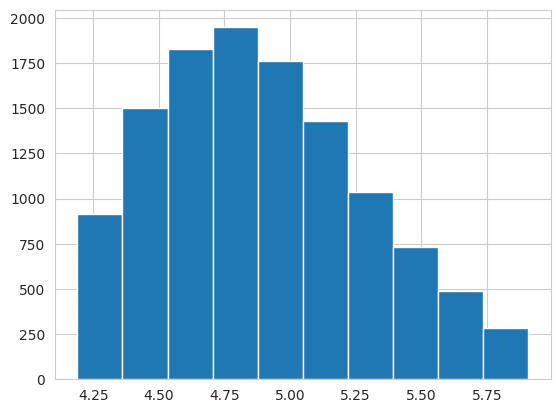

In [ ]:
# Possible consideration - logarithm transformation - can help to get better fit??
data['log_price'] = data.price.apply(np.log)
data['log2_price'] = data.log_price.apply(np.log)
data['log3_price'] = data.log2_price.apply(np.log)
data['log4_price'] = data.log3_price.apply(np.log)
data['log5_price'] = data.log4_price.apply(np.log)
data['sqrt_price'] = data.price.apply(np.sqrt)

data.log_price.hist()

# Kodowanie zmiennych kategorycznych do numerycznych
po to by móc zrobić SHAP

In [ ]:
# Zakoduj zmienne kategoryczne
X_encoded = data.copy()

# Konwertuj wszystkie boolean na int
bool_cols = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_cols] = X_encoded[bool_cols].astype(int)

# One-hot encoding dla zmiennych kategorycznych
categorical_cols = ['property_type_map', 'neighbourhood_cleansed_map']

for col in categorical_cols:
    if col in X_encoded.columns:
        dummies = pd.get_dummies(X_encoded[col], prefix=col, drop_first=True, dtype=int)
        # Zamień spacje na podkreślenia w nazwach dummy columns
        dummies.columns = dummies.columns.str.replace(' ', '_')
        X_encoded = pd.concat([X_encoded.drop(col, axis=1), dummies], axis=1)

# Zamień spacje na podkreślenia we wszystkich nazwach kolumn (na wszelki wypadek)
X_encoded.columns = X_encoded.columns.str.replace(' ', '_')

X_encoded.head(10)
data_encoded = X_encoded

### Coded Numerical Columns

In [ ]:
# get all numeric - just string creation
all_num_feats = [x for x in data_encoded.dtypes[data_encoded.dtypes != 'object'].index if not ('id' in x)
and not ('url' in x) and not ('price' in x)
and not ('longitude' in x) and not ('latitude' in x) ]

# print numerical features
print(" \n + ".join(all_num_feats))

accommodates 
 + bathrooms 
 + bedrooms 
 + beds 
 + minimum_nights 
 + maximum_nights 
 + minimum_minimum_nights 
 + maximum_minimum_nights 
 + minimum_maximum_nights 
 + maximum_maximum_nights 
 + minimum_nights_avg_ntm 
 + maximum_nights_avg_ntm 
 + estimated_occupancy_l365d 
 + estimated_revenue_l365d 
 + instant_bookable 
 + lat_dist_mean 
 + lon_dist_mean 
 + lat_dist_mean_sqrt 
 + lon_dist_mean_sqrt 
 + lat_dist_centre 
 + lon_dist_centre 
 + dist_from_center 
 + dist_from_center_sqrt 
 + dist_from_center_square 
 + bedrooms_sqrt 
 + bathrooms_sqrt 
 + accommodates_sqrt 
 + n_amenities 
 + is_private_patio_or_balcony 
 + is_hair_dryer 
 + is_bed_linens 
 + is_cooking_basics 
 + is_wifi 
 + is_dishes_and_silverware 
 + is_microwave 
 + is_freezer 
 + is_laundromat_nearby 
 + is_long_term_stays_allowed 
 + is_hot_water 
 + is_hangers 
 + is_extra_pillows_and_blankets 
 + is_coffee_maker 
 + is_bathtub 
 + is_dining_table 
 + is_kitchen 
 + is_free_washer___in_unit 
 + is_drying_ra

# MODELLING
OLS - ordinary least squares - zwykła metoda najmniejszych kwadratów

In [ ]:
# Create copy of data
X = data.copy()
X.dropna()

X['log_price'] = X.price.apply(np.log)
X.head(3)

id                         listing_url       scrape_id last_scraped       source                                              name                                        description                                        picture_url neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_last_scraped  estimated_occupancy_l365d  estimated_revenue_l365d  instant_bookable price_category  lat_dist_mean  lon_dist_mean  lat_dist_mean_sqrt  lon_dist_mean_sqrt  lat_dist_centre  lon_dist_centre  dist_from_center  dist_from_center_sqrt  dist_from_center_square  bedrooms_sqrt  bathrooms_sqrt  accommodates_sqrt neighbourhood_cleansed_map  n_amenities                                   amenities_parsed  is_private_patio_or_balcony  is_hair_dryer  is_bed_linens  is_cooking_basics  is_wifi  is_dishes_and_silverware  is_microwave  is_freezer  is_laundromat_nearby  is_long_term_stays_allowed  is_hot_water  is_hangers  is_extra_pillows_and_blankets  is_coffee_maker  is_bathtub  is_dining_table  is_kitchen  is_free_washer___in_unit  is_drying_rack_for_clothing  is_city_skyline_view  is_essentials  is_dedicated_workspace  is_toaster  is_hot_water_kettle  is_refrigerator  is_heating  is_host_greets_you  is_wine_glasses  is_iron  is_dishwasher  is_paid_parking_off_premises  is_stove  is_clothing_storage_closet  is_patio_or_balcony  is_shampoo  is_air_conditioning  is_pets_allowed  is_luggage_dropoff_allowed  is_smoke_alarm  is_dryer  is_carbon_monoxide_alarm  is_self_check_in  is_oven  is_washer  is_cleaning_products  is_first_aid_kit  is_shower_gel  is_tv  is_room_darkening_shades  is_body_soap  is_lockbox  is_elevator  is_fire_extinguisher  is_private_entrance  is_ethernet_connection  is_heating___split_type_ductless_system  is_ac___split_type_ductless_system  is_clothing_storage  is_coffee  is_conditioner  is_crib  is_single_level_home  is_smart_lock  is_blender  is_coffee_maker_nespresso   property_type_map  log_price  log2_price  log3_price  log4_price  log5_price  sqrt_price
6  70073  https://www.airbnb.com/rooms/70073  20250914152907   2025-09-15  city scrape              Adorable Apartment Malasaña-Gran Via  Beautiful apartment with spacious living room ...  https://a0.muscache.com/pictures/25829727/eedd...            Universidad                       Centro  40.42252   -3.70250  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   1.0  ["Electric stove", "Private patio or balcony",...  116.0              30             360                    30.0                    30.0                  1125.0                  1125.0                    30.0                  1125.0            2025-09-15                         60                   6960.0                 0             Q2       0.000001       0.000068            0.001056            0.008237         0.000049         0.000024          0.008557               0.092505                 0.000073       1.000000             1.0           1.414214                Universidad           36  [Electric stove, Private patio or balcony, Cen...                            1              1              1                  1        1                         1             1           1                     1                           1             1           1                              1                1           1                1           1                         1                            1                     1              1                       1           1                    1                1           1                   1                1        1              1                             1         0               

To use:
 + neighbourhood_cleansed_map
 + property_type_map

+ C(neighbourhood_cleansed_map,  Treatment(reference="other"))
+ C(property_type_map,  Treatment(reference="other"))

## 1 Model fit - simple

one-hot code encoding - C oznacza ze to kategoryczna

*zmienne   P>|t| > 0.2 na pewno do wywalenia*

Znaczenie zmiennych:
* **accommodates** - liczba osób którą pomieści

Brakuje zmiennej '**guests included**' ale chyba accommodates to jest to samo



In [ ]:
# Our first linear model
model = smf.ols(
    '''price ~ accommodates
                   + bathrooms
                   + bedrooms
                   + beds
                   + minimum_nights
                   + maximum_nights
                   + is_wifi
                   + is_tv
                   + is_essentials
                   + n_amenities
                   + lat_dist_mean
                   + lon_dist_mean
                   + dist_from_center
                   + neighbourhood_cleansed_map
                   + property_type_map
    ''',
    data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:17   Log-Likelihood:                -63041.
No. Observations:               11924   AIC:                         1.262e+05
Df Residuals:                   11884   BIC:                         1.265e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### RMSE

In [ ]:
'''RMSE wciąż lewa strona jest bardziej skośna robimy logarytm z ceny
'''
np.sqrt(model.mse_resid)

np.float64(47.92411445698789)

In [ ]:
# Calculate residuals
residuals = data['price'] - (model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(47.84366431723931)

In [ ]:
import plotly.express as px
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.939
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 5263.819
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## 2 Model fit - all

In [ ]:
# Our second linear model
model = smf.ols(
    '''price ~  accommodates
 + bathrooms
 + bedrooms
 + beds
 + minimum_nights
 + maximum_nights
 + minimum_minimum_nights
 + maximum_minimum_nights
 + minimum_maximum_nights
 + maximum_maximum_nights
 + minimum_nights_avg_ntm
 + maximum_nights_avg_ntm
 + estimated_occupancy_l365d
 + estimated_revenue_l365d
 + instant_bookable
 + lat_dist_mean
 + lon_dist_mean
 + lat_dist_mean_sqrt
 + lon_dist_mean_sqrt
 + lat_dist_centre
 + lon_dist_centre
 + dist_from_center
 + dist_from_center_sqrt
 + dist_from_center_square
 + bedrooms_sqrt
 + bathrooms_sqrt
 + accommodates_sqrt
 + n_amenities
 + is_private_patio_or_balcony
 + is_hair_dryer
 + is_bed_linens
 + is_cooking_basics
 + is_wifi
 + is_dishes_and_silverware
 + is_microwave
 + is_freezer
 + is_laundromat_nearby
 + is_long_term_stays_allowed
 + is_hot_water
 + is_hangers
 + is_extra_pillows_and_blankets
 + is_coffee_maker
 + is_bathtub
 + is_dining_table
 + is_kitchen
 + is_free_washer___in_unit
 + is_drying_rack_for_clothing
 + is_city_skyline_view
 + is_essentials
 + is_dedicated_workspace
 + is_toaster
 + is_hot_water_kettle
 + is_refrigerator
 + is_heating
 + is_host_greets_you
 + is_wine_glasses
 + is_iron
 + is_dishwasher
 + is_stove
 + is_clothing_storage_closet
 + is_patio_or_balcony
 + is_shampoo
 + is_air_conditioning
 + is_pets_allowed
 + is_luggage_dropoff_allowed
 + is_smoke_alarm
 + is_dryer
 + is_self_check_in
 + is_oven
 + is_washer
 + is_cleaning_products
 + is_shower_gel
 + is_tv
 + is_room_darkening_shades
 + is_body_soap
 + is_lockbox
 + is_elevator
 + is_fire_extinguisher
 + is_private_entrance
 + is_ethernet_connection
 + is_heating___split_type_ductless_system
 + is_ac___split_type_ductless_system
 + is_clothing_storage
 + is_coffee
 + is_conditioner
 + is_crib
 + is_single_level_home
 + is_smart_lock
 + is_blender
 + is_coffee_maker_nespresso
                   + neighbourhood_cleansed_map
                   + property_type_map
    ''',
    data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:32   Log-Likelihood:                -59466.
No. Observations:               11924   AIC:                         1.192e+05
Df Residuals:                   11808   BIC:                         1.200e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
residuals = data['price'] - (model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(35.45046949282706)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.907
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 17748.881
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## Eksport parametrów modelu liniowego

In [ ]:
# Eksport parametrów nachylenia
model.params.round(4).to_excel('params.xlsx')
# Eksport p-values i innych istotnych parametrów
results_summary = pd.DataFrame({
    'coefficient': model.params,
    'std_err': model.bse,
    't_value': model.tvalues,
    'p_value': model.pvalues,
    'conf_lower': model.conf_int()[0],
    'conf_upper': model.conf_int()[1]
})

results_summary.round(4).to_excel('model_results_linear.xlsx')

## 3 Model fit - log_price & simple

In [ ]:
# Our first linear model
model = smf.ols(
    '''log_price ~ accommodates
                   + bathrooms
                   + bedrooms
                   + beds
                   + minimum_nights
                   + maximum_nights
                   + is_wifi
                   + is_tv
                   + is_essentials
                   + n_amenities
                   + lat_dist_mean
                   + lon_dist_mean
                   + dist_from_center
                   + neighbourhood_cleansed_map
                   + property_type_map
    ''',
    data=data).fit()
# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     209.2
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:37   Log-Likelihood:                -2640.2
No. Observations:               11924   AIC:                             5360.
Df Residuals:                   11884   BIC:                             5656.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
residuals = data['price'] - np.exp(model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(48.78703455594179)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.929
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 368.043
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## 4 Model fit - log_price & all

In [ ]:
# Our first linear model
model = smf.ols(
    '''log_price ~ accommodates
 + bathrooms
 + bedrooms
 + beds
 + minimum_nights
 + maximum_nights
 + minimum_minimum_nights
 + maximum_minimum_nights
 + minimum_maximum_nights
 + maximum_maximum_nights
 + minimum_nights_avg_ntm
 + maximum_nights_avg_ntm
 + estimated_occupancy_l365d
 + estimated_revenue_l365d
 + instant_bookable
 + lat_dist_mean
 + lon_dist_mean
 + lat_dist_mean_sqrt
 + lon_dist_mean_sqrt
 + lat_dist_centre
 + lon_dist_centre
 + dist_from_center
 + dist_from_center_sqrt
 + dist_from_center_square
 + bedrooms_sqrt
 + bathrooms_sqrt
 + accommodates_sqrt
 + n_amenities
 + is_private_patio_or_balcony
 + is_hair_dryer
 + is_bed_linens
 + is_cooking_basics
 + is_wifi
 + is_dishes_and_silverware
 + is_microwave
 + is_freezer
 + is_laundromat_nearby
 + is_long_term_stays_allowed
 + is_hot_water
 + is_hangers
 + is_extra_pillows_and_blankets
 + is_coffee_maker
 + is_bathtub
 + is_dining_table
 + is_kitchen
 + is_free_washer___in_unit
 + is_drying_rack_for_clothing
 + is_city_skyline_view
 + is_essentials
 + is_dedicated_workspace
 + is_toaster
 + is_hot_water_kettle
 + is_refrigerator
 + is_heating
 + is_host_greets_you
 + is_wine_glasses
 + is_iron
 + is_dishwasher
 + is_stove
 + is_clothing_storage_closet
 + is_patio_or_balcony
 + is_shampoo
 + is_air_conditioning
 + is_pets_allowed
 + is_luggage_dropoff_allowed
 + is_smoke_alarm
 + is_dryer
 + is_self_check_in
 + is_oven
 + is_washer
 + is_cleaning_products
 + is_shower_gel
 + is_tv
 + is_room_darkening_shades
 + is_body_soap
 + is_lockbox
 + is_elevator
 + is_fire_extinguisher
 + is_private_entrance
 + is_ethernet_connection
 + is_heating___split_type_ductless_system
 + is_ac___split_type_ductless_system
 + is_clothing_storage
 + is_coffee
 + is_conditioner
 + is_crib
 + is_single_level_home
 + is_smart_lock
 + is_blender
 + is_coffee_maker_nespresso
                   + neighbourhood_cleansed_map
                   + property_type_map
    ''',
    data=data).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:38   Log-Likelihood:                 1033.2
No. Observations:               11924   AIC:                            -1834.
Df Residuals:                   11808   BIC:                            -977.5
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
residuals = data['price'] - np.exp(model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(39.301194066419846)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.863
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 1776.064
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



RMSE może być wyższe, ale ważne żeby rezydua spełniały założenia modelu liniowego, więc teraz jest lepiej jeśli testy liniowości będą spełnione.

Ten model jest bardziej przydatny predykcyjnie.

## 5 Model - log_price & all (coded) - export
Powinien dać to samo co model 4, ale:
* sprawdzenie rzutowania
* wygodniejszy do exportu
* mapowanie do SHAP-values

In [ ]:
# Our first linear model
model = smf.ols(
    '''log_price ~ accommodates
 + bathrooms
 + bedrooms
 + beds
 + minimum_nights
 + maximum_nights
 + minimum_minimum_nights
 + maximum_minimum_nights
 + minimum_maximum_nights
 + maximum_maximum_nights
 + minimum_nights_avg_ntm
 + maximum_nights_avg_ntm
 + estimated_occupancy_l365d
 + estimated_revenue_l365d
 + instant_bookable
 + lat_dist_mean
 + lon_dist_mean
 + lat_dist_mean_sqrt
 + lon_dist_mean_sqrt
 + lat_dist_centre
 + lon_dist_centre
 + dist_from_center
 + dist_from_center_sqrt
 + dist_from_center_square
 + bedrooms_sqrt
 + bathrooms_sqrt
 + accommodates_sqrt
 + n_amenities
 + is_private_patio_or_balcony
 + is_hair_dryer
 + is_bed_linens
 + is_cooking_basics
 + is_wifi
 + is_dishes_and_silverware
 + is_microwave
 + is_freezer
 + is_laundromat_nearby
 + is_long_term_stays_allowed
 + is_hot_water
 + is_hangers
 + is_extra_pillows_and_blankets
 + is_coffee_maker
 + is_bathtub
 + is_dining_table
 + is_kitchen
 + is_free_washer___in_unit
 + is_drying_rack_for_clothing
 + is_city_skyline_view
 + is_essentials
 + is_dedicated_workspace
 + is_toaster
 + is_hot_water_kettle
 + is_refrigerator
 + is_heating
 + is_host_greets_you
 + is_wine_glasses
 + is_iron
 + is_dishwasher
 + is_stove
 + is_clothing_storage_closet
 + is_patio_or_balcony
 + is_shampoo
 + is_air_conditioning
 + is_pets_allowed
 + is_luggage_dropoff_allowed
 + is_smoke_alarm
 + is_dryer
 + is_self_check_in
 + is_oven
 + is_washer
 + is_cleaning_products
 + is_shower_gel
 + is_tv
 + is_room_darkening_shades
 + is_body_soap
 + is_lockbox
 + is_elevator
 + is_fire_extinguisher
 + is_private_entrance
 + is_ethernet_connection
 + is_heating___split_type_ductless_system
 + is_ac___split_type_ductless_system
 + is_clothing_storage
 + is_coffee
 + is_conditioner
 + is_crib
 + is_single_level_home
 + is_smart_lock
 + is_blender
 + is_coffee_maker_nespresso
 + property_type_map_Entire_home
 + property_type_map_Entire_loft
 + property_type_map_Entire_rental_unit
 + property_type_map_Entire_serviced_apartment
 + property_type_map_Room_in_aparthotel
 + property_type_map_other
 + neighbourhood_cleansed_map_Argüelles
 + neighbourhood_cleansed_map_Castellana
 + neighbourhood_cleansed_map_Castillejos
 + neighbourhood_cleansed_map_Cortes
 + neighbourhood_cleansed_map_Cuatro_Caminos
 + neighbourhood_cleansed_map_Embajadores
 + neighbourhood_cleansed_map_Goya
 + neighbourhood_cleansed_map_Guindalera
 + neighbourhood_cleansed_map_Ibiza
 + neighbourhood_cleansed_map_Justicia
 + neighbourhood_cleansed_map_Lista
 + neighbourhood_cleansed_map_Palacio
 + neighbourhood_cleansed_map_Palos_de_Moguer
 + neighbourhood_cleansed_map_Recoletos
 + neighbourhood_cleansed_map_San_Diego
 + neighbourhood_cleansed_map_Sol
 + neighbourhood_cleansed_map_Trafalgar
 + neighbourhood_cleansed_map_Valdeacederas
 + neighbourhood_cleansed_map_other
    ''',
    data=data_encoded).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     219.9
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:39   Log-Likelihood:                 1032.6
No. Observations:               11924   AIC:                            -1835.
Df Residuals:                   11809   BIC:                            -985.8
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
residuals = data['price'] - np.exp(model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(39.30228594751351)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.863
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 1776.959
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## Eksport parametrów modelu liniowego

In [ ]:
# Eksport parametrów nachylenia
model.params.round(4).to_excel('params.xlsx')
# Eksport p-values i innych istotnych parametrów
results_summary = pd.DataFrame({
    'coefficient': model.params,
    'std_err': model.bse,
    't_value': model.tvalues,
    'p_value': model.pvalues,
    'conf_lower': model.conf_int()[0],
    'conf_upper': model.conf_int()[1]
})

results_summary.round(4).to_excel('model_results_log.xlsx')

## 6 Model - log_price & istotne (p>0.05)

In [ ]:
# Our first linear model
model = smf.ols(
    '''log_price ~  minimum_nights_avg_ntm
+ accommodates_sqrt
+ bedrooms
+ lat_dist_centre
+ dist_from_center_square
+ maximum_minimum_nights
+ is_hot_water
+ instant_bookable
+ is_dishwasher
+ neighbourhood_cleansed_map_Recoletos
+ is_elevator
+ is_drying_rack_for_clothing
+ is_hair_dryer
+ lat_dist_mean
+ minimum_minimum_nights
+ is_cooking_basics
+ accommodates
+ is_air_conditioning
+ is_hot_water_kettle
+ bathrooms
+ neighbourhood_cleansed_map_Castellana
+ is_stove
+ is_dishes_and_silverware
+ property_type_map_Entire_serviced_apartment
+ is_washer
+ is_smoke_alarm
+ minimum_nights
+ neighbourhood_cleansed_map_Goya
+ is_ethernet_connection
+ is_essentials
+ lon_dist_mean
+ neighbourhood_cleansed_map_Cortes
+ is_dryer
+ neighbourhood_cleansed_map_Lista
+ neighbourhood_cleansed_map_Justicia
+ is_free_washer___in_unit
+ is_long_term_stays_allowed
+ lat_dist_mean_sqrt
+ is_iron
+ neighbourhood_cleansed_map_Sol
+ bedrooms_sqrt
+ is_microwave
+ is_extra_pillows_and_blankets
+ is_fire_extinguisher
+ is_self_check_in
+ is_shower_gel
+ is_coffee_maker_nespresso
+ neighbourhood_cleansed_map_Ibiza
+ dist_from_center
+ is_pets_allowed
+ is_lockbox
+ neighbourhood_cleansed_map_Valdeacederas
+ is_cleaning_products
+ n_amenities
+ is_tv
+ is_heating
+ bathrooms_sqrt
+ is_hangers
+ neighbourhood_cleansed_map_Argüelles
+ is_patio_or_balcony
+ is_dedicated_workspace
+ is_ac___split_type_ductless_system
+ is_wifi
+ property_type_map_Room_in_aparthotel
+ is_dining_table
    ''',
    data=data_encoded).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:40   Log-Likelihood:                -1734.7
No. Observations:               11924   AIC:                             3601.
Df Residuals:                   11858   BIC:                             4089.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
residuals = data['price'] - np.exp(model.predict(model.model.data.frame))

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(45.521284805572805)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.924
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 693.109
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## 6.2 Model - log_price & istotne (t>5.0)

In [ ]:
# Our first linear model
model = smf.ols(
    '''log_price ~  minimum_nights_avg_ntm
+ accommodates_sqrt
+ bedrooms
+ lat_dist_centre
+ dist_from_center_square
+ maximum_minimum_nights
+ is_hot_water
+ instant_bookable
+ is_dishwasher
+ neighbourhood_cleansed_map_Recoletos
+ is_elevator
+ is_drying_rack_for_clothing
+ is_hair_dryer
+ lat_dist_mean
+ minimum_minimum_nights
+ is_cooking_basics
+ accommodates
+ is_air_conditioning
+ is_hot_water_kettle
+ bathrooms
+ neighbourhood_cleansed_map_Castellana
+ is_stove
+ is_dishes_and_silverware
+ property_type_map_Entire_serviced_apartment
+ is_washer
+ is_smoke_alarm
+ minimum_nights
    ''',
    data=data_encoded).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     341.3
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:40   Log-Likelihood:                -2337.2
No. Observations:               11924   AIC:                             4730.
Df Residuals:                   11896   BIC:                             4937.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
predictionss = model.predict(model.model.data.frame)
for i in range(1):
  predictions_tmp = np.exp(predictionss)
  predictionss = predictions_tmp

residuals = data['price'] - predictionss

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(47.68046579258769)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.925
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 470.688
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



In [ ]:
data_encoded.head(1)

id                         listing_url       scrape_id last_scraped       source                                  name                                        description                                        picture_url neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_last_scraped  estimated_occupancy_l365d  estimated_revenue_l365d  instant_bookable price_category  lat_dist_mean  lon_dist_mean  lat_dist_mean_sqrt  lon_dist_mean_sqrt  lat_dist_centre  lon_dist_centre  dist_from_center  dist_from_center_sqrt  dist_from_center_square  bedrooms_sqrt  bathrooms_sqrt  accommodates_sqrt  n_amenities                                   amenities_parsed  is_private_patio_or_balcony  is_hair_dryer  is_bed_linens  is_cooking_basics  is_wifi  is_dishes_and_silverware  is_microwave  is_freezer  is_laundromat_nearby  is_long_term_stays_allowed  is_hot_water  is_hangers  is_extra_pillows_and_blankets  is_coffee_maker  is_bathtub  is_dining_table  is_kitchen  is_free_washer___in_unit  is_drying_rack_for_clothing  is_city_skyline_view  is_essentials  is_dedicated_workspace  is_toaster  is_hot_water_kettle  is_refrigerator  is_heating  is_host_greets_you  is_wine_glasses  is_iron  is_dishwasher  is_paid_parking_off_premises  is_stove  is_clothing_storage_closet  is_patio_or_balcony  is_shampoo  is_air_conditioning  is_pets_allowed  is_luggage_dropoff_allowed  is_smoke_alarm  is_dryer  is_carbon_monoxide_alarm  is_self_check_in  is_oven  is_washer  is_cleaning_products  is_first_aid_kit  is_shower_gel  is_tv  is_room_darkening_shades  is_body_soap  is_lockbox  is_elevator  is_fire_extinguisher  is_private_entrance  is_ethernet_connection  is_heating___split_type_ductless_system  is_ac___split_type_ductless_system  is_clothing_storage  is_coffee  is_conditioner  is_crib  is_single_level_home  is_smart_lock  is_blender  is_coffee_maker_nespresso  log_price  log2_price  log3_price  log4_price  log5_price  sqrt_price  property_type_map_Entire_home  property_type_map_Entire_loft  property_type_map_Entire_rental_unit  property_type_map_Entire_serviced_apartment  property_type_map_Room_in_aparthotel  property_type_map_other  neighbourhood_cleansed_map_Argüelles  neighbourhood_cleansed_map_Castellana  neighbourhood_cleansed_map_Castillejos  neighbourhood_cleansed_map_Cortes  neighbourhood_cleansed_map_Cuatro_Caminos  neighbourhood_cleansed_map_Embajadores  neighbourhood_cleansed_map_Goya  neighbourhood_cleansed_map_Guindalera  neighbourhood_cleansed_map_Ibiza  neighbourhood_cleansed_map_Justicia  neighbourhood_cleansed_map_Lista  neighbourhood_cleansed_map_Palacio  neighbourhood_cleansed_map_Palos_de_Moguer  neighbourhood_cleansed_map_Recoletos  neighbourhood_cleansed_map_San_Diego  neighbourhood_cleansed_map_Sol  neighbourhood_cleansed_map_Trafalgar  neighbourhood_cleansed_map_Universidad  neighbourhood_cleansed_map_Valdeacederas  neighbourhood_cleansed_map_other
6  70073  https://www.airbnb.com/rooms/70073  20250914152907   2025-09-15  city scrape  Adorable Apartment Malasaña-Gran Via  Beautiful apartment with spacious living room ...  https://a0.muscache.com/pictures/25829727/eedd...            Universidad                       Centro  40.42252    -3.7025  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   1.0  ["Electric stove", "Private patio or balcony",...  116.0              30             360                    30.0                    30.0                  1125.0                  1125.0                    30.0                  1125.0            2025-09-15                         60                   6960.0                 0             Q2       0.000001   

## 6.3 Model - log2_price & istotne (t>5.0)

In [ ]:
# Our first linear model
model = smf.ols(
    '''log2_price ~  estimated_occupancy_l365d
+ bedrooms
+ minimum_nights
+ minimum_nights_avg_ntm
+ is_air_conditioning
+ accommodates
+ property_type_map_Entire_serviced_apartment
+ is_dishwasher
+ dist_from_center
+ is_tv
+ bathrooms
+ n_amenities
+ maximum_minimum_nights
+ is_dishes_and_silverware
+ property_type_map_other
+ lon_dist_mean
    ''',
    data=data_encoded).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log2_price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     507.5
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:41   Log-Likelihood:                 16399.
No. Observations:               11924   AIC:                        -3.276e+04
Df Residuals:                   11907   BIC:                        -3.264e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
predictions = model.predict(model.model.data.frame)
for i in range(2):
  predictions_tmp = np.exp(predictions)
  predictions = predictions_tmp

residuals = data['price'] - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(49.38010842092938)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.927
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 116.058
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



# Skewness & Kurtosis test

📊 Box-Cox optymalny parametr lambda: -0.4596

Original - Kolmogorov-Smirnov p-value: 0.0000
Original - Skewness: 1.2136
Original - Kurtosis: 1.1692

Log - Kolmogorov-Smirnov p-value: 0.0000
Log - Skewness: 0.3891
Log - Kurtosis: -0.5387

Log2 - Kolmogorov-Smirnov p-value: 0.0000
Log2 - Skewness: 0.2358
Log2 - Kurtosis: -0.6676

Sqrt_log - Kolmogorov-Smirnov p-value: 0.0000
Sqrt_log - Skewness: 0.3121
Sqrt_log - Kurtosis: -0.6106

Box-Cox - Kolmogorov-Smirnov p-value: 0.0000
Box-Cox - Skewness: 0.0465
Box-Cox - Kurtosis: -0.7623



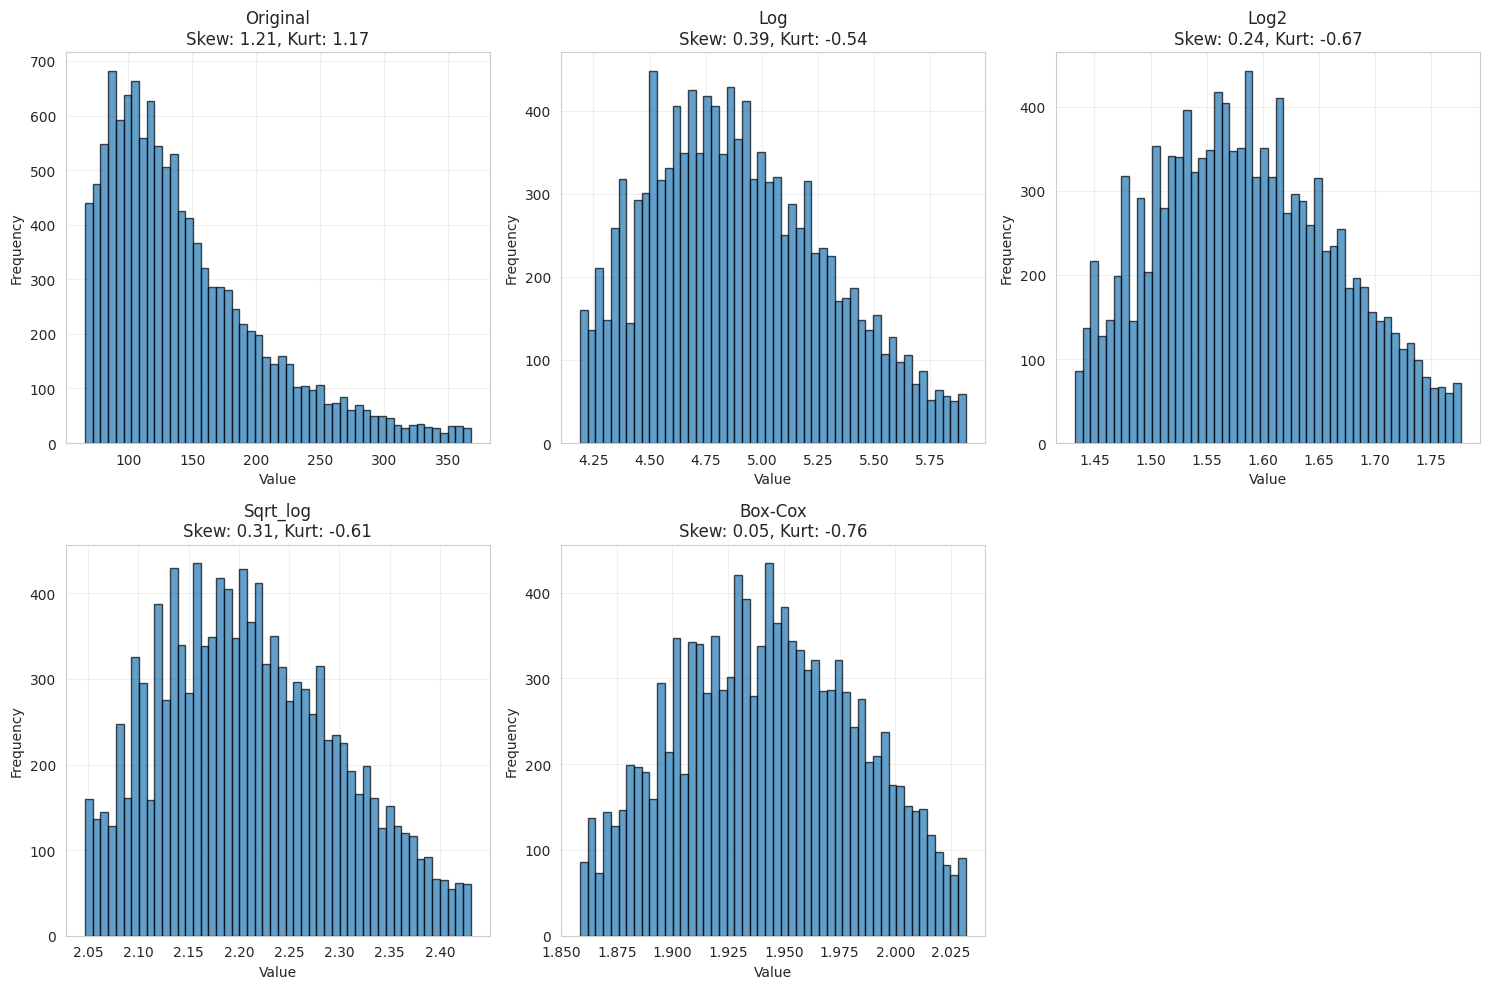


PODSUMOWANIE:
Original        | Skew:  1.214 | Kurt:  1.169
Log             | Skew:  0.389 | Kurt: -0.539
Log2            | Skew:  0.236 | Kurt: -0.668
Sqrt_log        | Skew:  0.312 | Kurt: -0.611
Box-Cox         | Skew:  0.047 | Kurt: -0.762


In [ ]:
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import numpy as np

def test_normality(data, name):
    """Test normalności rozkładu"""
    # Test Shapiro-Wilka (dla n < 5000)
    if len(data) < 5000:
        stat, p_value = stats.shapiro(data)
        print(f"{name} - Shapiro-Wilk p-value: {p_value:.4f}")

    # Test Kołmogorowa-Smirnowa
    stat, p_value = stats.kstest(data, 'norm')
    print(f"{name} - Kolmogorov-Smirnov p-value: {p_value:.4f}")

    # Skewness i Kurtosis
    print(f"{name} - Skewness: {stats.skew(data):.4f}")
    print(f"{name} - Kurtosis: {stats.kurtosis(data):.4f}")
    print()

# Przygotuj dane (usuń wartości <= 0 dla Box-Cox)
y=data['price']
y_positive = y[y > 0]

# Box-Cox transformacja
y_boxcox, lambda_param = boxcox(y_positive)
print(f"📊 Box-Cox optymalny parametr lambda: {lambda_param:.4f}\n")

# Testuj różne transformacje
transformations = {
    'Original': y,
    'Log': np.log(y_positive),
    'Log2': np.log(np.log(y_positive)),
    # 'Log1p': np.log1p(y),
    # 'Sqrt': np.sqrt(y[y >= 0]),
    'Sqrt_log': np.sqrt(np.log(y_positive)),
    # 'Sqrt_log2': np.sqrt(np.log(np.log(y_positive))),
    # 'Sqrt_log3': np.sqrt(np.log(np.log(np.log(y_positive)))),
    # 'Sqrt_log4': np.sqrt(np.log(np.log(np.log(np.log(y_positive))))),
    'Box-Cox': y_boxcox,
}

for name, dataa in transformations.items():
    test_normality(dataa, name)

# Wizualizacja
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, dataa) in enumerate(transformations.items()):
    axes[i].hist(dataa, bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{name}\nSkew: {stats.skew(dataa):.2f}, Kurt: {stats.kurtosis(dataa):.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Usuń pusty subplot
if len(transformations) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Podsumowanie
print("\n" + "="*60)
print("PODSUMOWANIE:")
print("="*60)
for name, dataa in transformations.items():
    print(f"{name:15} | Skew: {stats.skew(dataa):6.3f} | Kurt: {stats.kurtosis(dataa):6.3f}")

## 7 Model - box_cox & all

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Przygotuj dane - transformacja Box-Cox
y_positive = data_encoded['price'][data_encoded['price'] > 0]
data_boxcox = data_encoded[data_encoded['price'] > 0].copy()

# Oblicz Box-Cox transformację
y_boxcox, lambda_param = boxcox(y_positive)
data_boxcox['price_boxcox'] = y_boxcox

print(f"📊 Box-Cox optymalny parametr lambda: {lambda_param:.4f}\n")

# Model z transformacją Box-Cox
model = smf.ols(
    '''price_boxcox ~ accommodates
 + bathrooms
 + bedrooms
 + beds
 + minimum_nights
 + maximum_nights
 + minimum_minimum_nights
 + maximum_minimum_nights
 + minimum_maximum_nights
 + maximum_maximum_nights
 + minimum_nights_avg_ntm
 + maximum_nights_avg_ntm
 + estimated_occupancy_l365d
 + estimated_revenue_l365d
 + instant_bookable
 + lat_dist_mean
 + lon_dist_mean
 + lat_dist_mean_sqrt
 + lon_dist_mean_sqrt
 + lat_dist_centre
 + lon_dist_centre
 + dist_from_center
 + dist_from_center_sqrt
 + dist_from_center_square
 + bedrooms_sqrt
 + bathrooms_sqrt
 + accommodates_sqrt
 + n_amenities
 + is_private_patio_or_balcony
 + is_hair_dryer
 + is_bed_linens
 + is_cooking_basics
 + is_wifi
 + is_dishes_and_silverware
 + is_microwave
 + is_freezer
 + is_laundromat_nearby
 + is_long_term_stays_allowed
 + is_hot_water
 + is_hangers
 + is_extra_pillows_and_blankets
 + is_coffee_maker
 + is_bathtub
 + is_dining_table
 + is_kitchen
 + is_free_washer___in_unit
 + is_drying_rack_for_clothing
 + is_city_skyline_view
 + is_essentials
 + is_dedicated_workspace
 + is_toaster
 + is_hot_water_kettle
 + is_refrigerator
 + is_heating
 + is_host_greets_you
 + is_wine_glasses
 + is_iron
 + is_dishwasher
 + is_stove
 + is_clothing_storage_closet
 + is_patio_or_balcony
 + is_shampoo
 + is_air_conditioning
 + is_pets_allowed
 + is_luggage_dropoff_allowed
 + is_smoke_alarm
 + is_dryer
 + is_self_check_in
 + is_oven
 + is_washer
 + is_cleaning_products
 + is_shower_gel
 + is_tv
 + is_room_darkening_shades
 + is_body_soap
 + is_lockbox
 + is_elevator
 + is_fire_extinguisher
 + is_private_entrance
 + is_ethernet_connection
 + is_heating___split_type_ductless_system
 + is_ac___split_type_ductless_system
 + is_clothing_storage
 + is_coffee
 + is_conditioner
 + is_crib
 + is_single_level_home
 + is_smart_lock
 + is_blender
 + is_coffee_maker_nespresso
 + property_type_map_Entire_home
 + property_type_map_Entire_loft
 + property_type_map_Entire_rental_unit
 + property_type_map_Entire_serviced_apartment
 + property_type_map_Room_in_aparthotel
 + property_type_map_other
 + neighbourhood_cleansed_map_Argüelles
 + neighbourhood_cleansed_map_Castellana
 + neighbourhood_cleansed_map_Castillejos
 + neighbourhood_cleansed_map_Cortes
 + neighbourhood_cleansed_map_Cuatro_Caminos
 + neighbourhood_cleansed_map_Embajadores
 + neighbourhood_cleansed_map_Goya
 + neighbourhood_cleansed_map_Guindalera
 + neighbourhood_cleansed_map_Ibiza
 + neighbourhood_cleansed_map_Justicia
 + neighbourhood_cleansed_map_Lista
 + neighbourhood_cleansed_map_Palacio
 + neighbourhood_cleansed_map_Palos_de_Moguer
 + neighbourhood_cleansed_map_Recoletos
 + neighbourhood_cleansed_map_San_Diego
 + neighbourhood_cleansed_map_Sol
 + neighbourhood_cleansed_map_Trafalgar
 + neighbourhood_cleansed_map_Valdeacederas
 + neighbourhood_cleansed_map_other
    ''',
    data=data_boxcox).fit()

# Wyświetl wyniki
print(model.summary())

# WAŻNE: Zapisz lambda_param do późniejszego odwrócenia predykcji
print(f"\n💾 Zapisz lambda_param = {lambda_param:.4f} do odwrócenia predykcji!")

# Przykład odwrócenia predykcji:
# predictions_boxcox = model.predict(X)
# predictions_original = inv_boxcox(predictions_boxcox, lambda_param)

📊 Box-Cox optymalny parametr lambda: -0.4596

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:42   Log-Likelihood:                 27796.
No. Observations:               11924   AIC:                        -5.536e+04
Df Residuals:                   11809   BIC:                        -5.451e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [ ]:
from scipy.special import inv_boxcox

# Calculate predictions w skali Box-Cox
predictions_boxcox = model.predict(model.model.data.frame)

# Odwróć transformację Box-Cox do oryginalnej skali
predictions_original = inv_boxcox(predictions_boxcox, lambda_param)

# Calculate residuals w oryginalnej skali cen
residuals = data_boxcox['price'] - predictions_original

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse:.2f}")

# Opcjonalnie - inne metryki - MAE = mean absolute error
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae:.2f}")

# Residuals w skali Box-Cox (dla diagnostyki modelu)
residuals_boxcox = data_boxcox['price_boxcox'] - predictions_boxcox

RMSE: 64.28
MAE: 28.57


### RMSE

In [ ]:
from scipy.special import inv_boxcox

# Calculate predictions w skali Box-Cox
predictions_boxcox = model.predict(model.model.data.frame)

# Calculate residuals
residuals = data_boxcox['price'] - inv_boxcox(predictions_boxcox, lambda_param)

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(64.27877575080109)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.503
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 670.041
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## Eksport parametrów modelu liniowego

In [ ]:
# Eksport parametrów nachylenia
model.params.round(4).to_excel('params.xlsx')
# Eksport p-values i innych istotnych parametrów
results_summary = pd.DataFrame({
    'coefficient': model.params,
    'std_err': model.bse,
    't_value': model.tvalues,
    'p_value': model.pvalues,
    'conf_lower': model.conf_int()[0],
    'conf_upper': model.conf_int()[1]
})

results_summary.round(4).to_excel('model_results_boxcox.xlsx')

## 8 Model - box_cox & istotne (lasso)

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Przygotuj dane - transformacja Box-Cox
y_positive = data_encoded['price'][data_encoded['price'] > 0]
data_boxcox = data_encoded[data_encoded['price'] > 0].copy()

# Oblicz Box-Cox transformację
y_boxcox, lambda_param = boxcox(y_positive)
data_boxcox['price_boxcox'] = y_boxcox
data['price_boxcox'] = y_boxcox

print(f"📊 Box-Cox optymalny parametr lambda: {lambda_param:.4f}\n")

# Model z transformacją Box-Cox
model = smf.ols(
    '''price_boxcox ~  bathrooms
+ accommodates_sqrt
+ bedrooms_sqrt
+ lat_dist_mean_sqrt
+ lon_dist_mean_sqrt
+ is_dishwasher
+ is_elevator
+ is_crib
+ property_type_map_Entire_serviced_apartment
+ is_smoke_alarm
+ is_self_check_in
    ''',
    data=data_boxcox).fit()

# Wyświetl wyniki
print(model.summary())

# WAŻNE: Zapisz lambda_param do późniejszego odwrócenia predykcji
print(f"\n💾 Zapisz lambda_param = {lambda_param:.4f} do odwrócenia predykcji!")

# Przykład odwrócenia predykcji:
# predictions_boxcox = model.predict(X)
# predictions_original = inv_boxcox(predictions_boxcox, lambda_param)

📊 Box-Cox optymalny parametr lambda: -0.4596

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     692.1
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:43   Log-Likelihood:                 24231.
No. Observations:               11924   AIC:                        -4.844e+04
Df Residuals:                   11912   BIC:                        -4.835e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [ ]:
# from scipy.stats import boxcox
# from scipy.special import inv_boxcox

# # Przygotuj dane - transformacja Box-Cox
# y_positive = data_encoded['price'][data_encoded['price'] > 0]
# data_boxcox = data_encoded[data_encoded['price'] > 0].copy()

# # Oblicz Box-Cox transformację
# y_boxcox, lambda_param = boxcox(y_positive)
# data_boxcox['price_boxcox'] = y_boxcox
# data['price_boxcox'] = y_boxcox

# print(f"📊 Box-Cox optymalny parametr lambda: {lambda_param:.4f}\n")

# # Model z transformacją Box-Cox
# model = smf.ols(
#     '''price_boxcox ~  bathrooms
# + bedrooms_sqrt
# + accommodates
# + lat_dist_mean
# + lon_dist_mean
# + dist_from_center_sqrt
# + neighbourhood_cleansed_map_other
# + instant_bookable
# + minimum_nights_avg_ntm
# + maximum_nights_avg_ntm
# + property_type_map_Entire_serviced_apartment
# + minimum_minimum_nights
# + is_dishwasher
# + is_elevator
# + is_crib
# + is_smoke_alarm
# + is_self_check_in
#     ''',
#     data=data_boxcox).fit()

# # Wyświetl wyniki
# print(model.summary())

# # WAŻNE: Zapisz lambda_param do późniejszego odwrócenia predykcji
# print(f"\n💾 Zapisz lambda_param = {lambda_param:.4f} do odwrócenia predykcji!")

# # Przykład odwrócenia predykcji:
# # predictions_boxcox = model.predict(X)
# # predictions_original = inv_boxcox(predictions_boxcox, lambda_param)

### RMSE

In [ ]:
from scipy.special import inv_boxcox

# Calculate predictions w skali Box-Cox
predictions_boxcox = model.predict(model.model.data.frame)

# Calculate residuals
residuals = data_boxcox['price'] - inv_boxcox(predictions_boxcox, lambda_param)

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(49.946234203369414)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.926
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 21.440
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



# FINAL 6.3 Model - log3_price & istotne (t>5.0) & ręcznie dodane

In [ ]:
# MODEL ZE ZMIENNYMI KWADRATOWYMI
#  estimated_occupancy_l365d
#+ availability_30
#+ is_hot_water_kettle
#+ neighbourhood_cleansed_map_Praha_4
# dist_from_center_sqrt
# bedrooms_sqrt
model = smf.ols(
    '''log3_price ~   bathrooms
+ accommodates_sqrt
+ bedrooms_sqrt
+ lat_dist_mean_sqrt
+ lon_dist_mean_sqrt
+ is_dishwasher
+ is_elevator
+ is_crib
+ property_type_map_Entire_serviced_apartment
+ is_smoke_alarm
+ is_self_check_in
    ''',
    data=data_encoded).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log3_price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     699.9
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:43   Log-Likelihood:                 21808.
No. Observations:               11924   AIC:                        -4.359e+04
Df Residuals:                   11912   BIC:                        -4.350e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### RMSE

In [ ]:
# Calculate residuals
predictions = model.predict(model.model.data.frame)
for i in range(3): #stopień logarytmu
  predictions_tmp = np.exp(predictions)
  predictions = predictions_tmp

residuals = data['price'] - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

np.float64(49.472235221145255)

In [ ]:
px.histogram(model.resid)

### Test Shapiro-Wilka
Test Shapiro-Wilka sprawdza czy dane pochodzą z rozkładu normalnego porównując obserwowany rozkład z teoretycznym rozkładem normalnym, gdzie statystyka W przyjmuje wartości od 0 do 1 (wartości powyżej 0.95 sugerują normalność), a rozkład uznajemy za normalny gdy p-value > 0.05. Jest najbardziej czuły i skuteczny dla małych i średnich prób (do około 5000 obserwacji).

$H_0:$ dane pochodzą z rozkładu normalnego

### Test Jarque-Bera - bazuje na skońcości i kurtozie
Test Jarque-Bera testuje normalność danych poprzez jednoczesne sprawdzenie czy skośność wynosi 0 i czy kurtoza wynosi 3, gdzie statystyka JB bliska 0 (typowo JB < 6) wskazuje na normalność, a wartości JB > 6 sugerują odchylenia od rozkładu normalnego. Jest szczególnie użyteczny dla dużych zbiorów danych (ponad 2000 obserwacji), gdzie rozkład uznajemy za normalny gdy p-value > 0.05.

$H_0:$ dane pochodzą z rozkładu normalnego - ta sama hipoteza co dla testu S-W

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.928
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 70.222
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11924.



## Eksport parametrów modelu liniowego

In [ ]:
# Eksport parametrów nachylenia
model.params.round(4).to_excel('params.xlsx')
# Eksport p-values i innych istotnych parametrów
results_summary = pd.DataFrame({
    'coefficient': model.params,
    'std_err': model.bse,
    't_value': model.tvalues,
    'p_value': model.pvalues,
    'conf_lower': model.conf_int()[0],
    'conf_upper': model.conf_int()[1]
})

results_summary.round(4).to_excel('model_results_final.xlsx')

# TESTY MODELU

### Residuals calculation

!!! Rezydua
Rezydua powinny mieć rozkład normalny, standardowy, wokół średniej = 0

Otrzymany rozkład jest bardzo skośny.

Błędy nie mają rozkładu nomalnego - a to jest założenie że OLS jest poprawne.

## Testy rezyduów (wartości różnicowych)
Tests of residuals

!!! Testy czy rezydua mają rozkład normalny

H0 - hipoteza zerowa - tak, mają rozkład normalny, są typowe

wynik = 0 - ta próbka nie pochodzi z rozkładu normalnego, dane są istotne i mają korelację

p --> 0, więc test t-studenta nie przeszedł

### Test Shapiro-Wilka
Test Shapiro-Wilka sprawdza czy dane pochodzą z rozkładu normalnego porównując obserwowany rozkład z teoretycznym rozkładem normalnym, gdzie statystyka W przyjmuje wartości od 0 do 1 (wartości powyżej 0.95 sugerują normalność), a rozkład uznajemy za normalny gdy p-value > 0.05. Jest najbardziej czuły i skuteczny dla małych i średnich prób (do około 5000 obserwacji).

$H_0:$ dane pochodzą z rozkładu normalnego

### Test Jarque-Bera - bazuje na skońcości i kurtozie
Test Jarque-Bera testuje normalność danych poprzez jednoczesne sprawdzenie czy skośność wynosi 0 i czy kurtoza wynosi 3, gdzie statystyka JB bliska 0 (typowo JB < 6) wskazuje na normalność, a wartości JB > 6 sugerują odchylenia od rozkładu normalnego. Jest szczególnie użyteczny dla dużych zbiorów danych (ponad 2000 obserwacji), gdzie rozkład uznajemy za normalny gdy p-value > 0.05.

$H_0:$ dane pochodzą z rozkładu normalnego - ta sama hipoteza co dla testu S-W

In [ ]:
from scipy.stats import shapiro
from scipy.stats import jarque_bera

stat, p_value = shapiro(residuals)

print(f"Statystyka testu Shapiro-Wilka: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja wyniku
if p_value > 0.05:
    print("Brak dowodów na odrzucenie hipotezy zerowej – reszty pochodzą z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.")
print()

stat, p_value = jarque_bera(model.resid)

print(f"Statystyka testu Jarque-Bera: {stat:.3f}")
print(f"Wartość p: {p_value:.3f}")

# Interpretacja
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na odrzucenie hipotezy zerowej – dane mogą pochodzić z rozkładu normalnego.")


Statystyka testu Shapiro-Wilka: 0.928
Wartość p: 0.000
Odrzucamy hipotezę zerową – reszty nie pochodzą z rozkładu normalnego.

Statystyka testu Jarque-Bera: 70.222
Wartość p: 0.000
Odrzucamy hipotezę zerową – dane nie pochodzą z rozkładu normalnego.


Statystyka Durbin-Watsona (DW)

Cel: Sprawdzenie autokorelacji (czyli zależności reszt od siebie) w regresji.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print("Statystyka Durbin-Watsona:", dw_stat)

# Interpretacja
if dw_stat < 1.5:
    print("Pozytywna autokorelacja.")
elif dw_stat > 2.5:
    print("Negatywna autokorelacja.")
else:
    print("Brak autokorelacji.")

Statystyka Durbin-Watsona: 1.7428577839885842
Brak autokorelacji.


### Testy heteroskedastyczności

Czy występuje heteroskedastyczność? (cokolwiek to znaczy)

Heteroskedastyczność to sytuacja, w której wariancja błędów modelu regresji nie jest stała i zmienia się w zależności od wartości zmiennych - na przykład błędy predykcji są małe dla tanich mieszkań (±5€), ale duże dla drogich (±50€). Jest to problem, ponieważ powoduje że testy statystyczne (p-wartości) są niewiarygodne, a przedziały ufności błędnie oszacowane. Wykrywa się ją testem Breuscha-Pagana (p < 0.05 = heteroskedastyczność) lub wizualnie na wykresie residuals vs fitted (kształt lejka/trąby oznacza heteroskedastyczność).

### Test White'a
Cel: Również test heteroskedastyczności, ale bardziej ogólny – wykrywa zależność wariancji reszt od dowolnej kombinacji zmiennych objaśniających (nie tylko liniowej).

### Test Breuscha-Pagana
Cel: Wykrywanie heteroskedastyczności – czyli sytuacji, gdy wariancja reszt nie jest stała w różnych przedziałach wartości (przeciwieństwo homoskedastyczności).


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

bp_test = het_breuschpagan(model.resid, model.model.exog)

print(f"Statystyka testu Breuscha-Pagana: {bp_test[0]:.3f}")
print(f"Wartość p:", bp_test[1])
print(f"Wartość p: {bp_test[1]:.3f}")

if bp_test[1] < 0.05:
    print("Odrzucamy hipotezę zerową – występuje heteroskedastyczność.")
else:
    print("Brak dowodów na heteroskedastyczność.")
print()

# white_test = het_white(model.resid, model.model.exog)

# # print("Statystyka testu Whitea'a:", white_test[0])
# print(f"Statystyka testu Whitea'a: {white_test[0]:.3f}")
# print("Wartość p:", white_test[1])
# print(f"Wartość p: {white_test[1]:.3f}")

# if white_test[1] < 0.05:
#     print("Odrzucamy hipotezę zerową – występuje heteroskedastyczność.")
# else:
#     print("Brak dowodów na heteroskedastyczność.")

Statystyka testu Breuscha-Pagana: 126.979
Wartość p: 7.106013603010043e-22
Wartość p: 0.000
Odrzucamy hipotezę zerową – występuje heteroskedastyczność.



In [ ]:
import signal
from contextlib import contextmanager
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Timeout context manager
@contextmanager
def timeout(duration):
    def timeout_handler(signum, frame):
        raise TimeoutError(f"Operacja przekroczyła limit czasu ({duration}s)")

    signal.signal(signal.SIGALRM, timeout_handler)
    signal.alarm(duration)
    try:
        yield
    finally:
        signal.alarm(0)

# Test White'a z zabezpieczeniami
try:
    with timeout(30):  # Timeout 30 sekund
        white_test = het_white(model.resid, model.model.exog)

    print(f"Statystyka testu White'a: {white_test[0]:.3f}")

    # Sprawdź czy p-value jest ekstremalnie małe
    if white_test[1] < 1e-100:
        print(f"Wartość p: < 1e-100 (ekstremalnie mała)")
        print("⚠️ Wartość p jest poniżej progu precyzji - test wskazuje na silną heteroskedastyczność")
    else:
        print(f"Wartość p: {white_test[1]:.3e}")

    if white_test[1] < 0.05:
        print("Odrzucamy hipotezę zerową – występuje heteroskedastyczność.")
    else:
        print("Brak dowodów na heteroskedastyczność.")

except TimeoutError as e:
    print(f"⏱️ {e}")
    print("⚠️ Test White'a został przerwany - zbyt długie obliczenia")
    print("Sugestia: Użyj robust standard errors zamiast testu White'a")

except Exception as e:
    print(f"❌ Błąd podczas testu White'a: {e}")
    print("Sugestia: Użyj robust standard errors (HC3)")

Statystyka testu White'a: 327.095
Wartość p: 1.600e-34
Odrzucamy hipotezę zerową – występuje heteroskedastyczność.


Regresja z błędami robusznymi typu HC3

Skoro testy pokazały heteroskedastyczność, klasyczne standardowe błędy OLS są niewiarygodne.

Można zastosować błędy robuszne (heteroskedastyczność-robust), np. HC3:

Poprawiają standardowe błędy współczynników regresji, żeby testy t i wartości p były bardziej wiarygodne w obecności heteroskedastyczności.

Sama estymacja współczynników β nie zmienia się – zmieniają się tylko standard errors, t-stat i p-values.

In [ ]:
# Heteroskedasticity-Consistent Standard Errors, HCSE) - robust='hc3'

### Metoda HC3
Liczy te parametry na nowo. Wszystko stoi na statystyce.

Przykład - zwiększymy o 1 pokój, cena rośnie o 16.3 dolara!!!!

Istotny parametr.

Czym jest intercept? To jest po prostu przecięcie z osią X dla modelu liniowego.

In [ ]:
# Regresja z błędami robusznymi typu HC3
robust_model = model.get_robustcov_results(cov_type='HC3')

# Wyświetlanie wyników modelu
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:             log3_price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     752.2
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:32:44   Log-Likelihood:                 21808.
No. Observations:               11924   AIC:                        -4.359e+04
Df Residuals:                   11912   BIC:                        -4.350e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# OPŁACALNOŚĆ MIESZKAŃ - Estymacja ceny m2, powierzchni, opłacalności

In [ ]:
# data_encoded.T.head(100)

## Normalizacja dist_from_center

In [ ]:
data_encoded['dist_from_center'].describe()

# Min-Max normalization of dist_from_center
min_val = data_encoded['dist_from_center'].min()
max_val = data_encoded['dist_from_center'].max()

data_encoded['dist_from_center'] = (data_encoded['dist_from_center'] - min_val) / (max_val - min_val)

data_encoded['dist_from_center'].describe()

count    11924.000000
mean         0.161354
std          0.157036
min          0.000000
25%          0.048063
50%          0.098839
75%          0.237857
max          1.000000
Name: dist_from_center, dtype: float64

## Założenia, obliczenia: powierzchni, ceny mieszkania, i opłacalności

In [ ]:
data_encoded['price_predictions'] = predictions
data_encoded['price_residuals'] = residuals
data_encoded['price_residuals_abs_err'] = data_encoded['price_residuals'].abs()

# Madryt - założenia zmiennej - 5000 eur/m2 na obrzeżach, 9000 eur/m2 w centrum
# założenia - średnie mieszkanie ma 50 m2
data_encoded['m2_price'] = 5000 + data_encoded['dist_from_center']*4000

# Praga - typowa kawalerka ma 30 m2 = 1 łazienka i 1 sypialnia
data_encoded['area_m2'] = 20 + data_encoded['bedrooms']*10 + data_encoded['bathrooms']*5 ### można jednak założyć, że w Pradze mieszkania są nieco mniejsze
data_encoded['apt_purchase_price'] = data_encoded['area_m2']*data_encoded['m2_price']
data_encoded['payback_time'] = data_encoded['apt_purchase_price']/data_encoded['price_predictions']

data_encoded.head(10).T

6                                                  7                                                  8                                                  11                                                 21                                                 28                                                 29                                                 30                                                 31                                                 32
id                                                                                       70073                                              70310                                              72150                                              86042                                             204570                                             256004                                             258713                                             260951                                             261878                                             263748
listing_url                                                 https://www.airbnb.com/rooms/70073                 https://www.airbnb.com/rooms/70310                 https://www.airbnb.com/rooms/72150                 https://www.airbnb.com/rooms/86042                https://www.airbnb.com/rooms/204570                https://www.airbnb.com/rooms/256004                https://www.airbnb.com/rooms/258713                https://www.airbnb.com/rooms/260951                https://www.airbnb.com/rooms/261878                https://www.airbnb.com/rooms/263748
scrape_id                                                                       20250914152907                                     20250914152907                                     20250914152907                                     20250914152907                                     20250914152907                                     20250914152907                                     20250914152907                                     20250914152907                                     20250914152907                                     20250914152907
last_scraped                                                                        2025-09-15                                         2025-09-15                                         2025-09-15                                         2025-09-15                                         2025-09-15                                         2025-09-15                                         2025-09-14                                         2025-09-14                                         2025-09-15                                         2025-09-14
source                                                                             city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape                                        city scrape
name                                                      Adorable Apartment Malasaña-Gran Via    Heart of Malasaña Cozy, Quiet & Sunny Apartment   Sunny attic duplex flat with terrace next to Sol  Cozy attic with intimate rooftop terrace+ elev...                 Lovely 110m2 home - Best location!       Casa Balconies Arco Toledo - Cuchilleros St.        Apartamento céntrico, tranquilo y luminoso.         Loft "A" Spectacular at IFEMA, Madrid Fair                        Great Studio! Best Reviews!                    LOFT "C" cerca de  IFEMA Madrid
description                                  Beautiful apartment with spacious living room ...  Cozy Apartment in great location in the center...  Nestled in the serene heart of Madrid, this re...  Nestled in Madri

## Podsumowanie opłacalności

In [ ]:
# Agregacja wyników - Madryt
summary = data_encoded[['price','price_predictions','price_residuals','price_residuals_abs_err','area_m2','apt_purchase_price','payback_time']].describe()
summary.style.format({
    'price': '{:.1f}',
    'price_predictions': '{:.1f}',
    'price_residuals': '{:.1f}',
    'price_residuals_abs_err': '{:.1f}',
    'area_m2': '{:.1f}',
    'apt_purchase_price': '{:,.0f}',
    'payback_time': '{:,.0f}'
})

## Analiza outlierów

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates', 'is_dishwasher','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nsmallest(10, 'price_residuals')[cols]

price  price_predictions  price_residuals  bedrooms  bathrooms  accommodates  is_dishwasher  area_m2  dist_from_center  apt_purchase_price  payback_time
15841  183.0         469.349343      -286.349343       6.0        6.0            14              0    110.0          0.337015       698286.513932   1487.775628
3163   302.0         522.853720      -220.853720       5.0        5.0            10              1     95.0          0.020863       482927.897449    923.638638
4124   275.0         470.926884      -195.926884       7.0        4.0            14              0    110.0          0.066397       579214.891061   1229.946538
8572   262.0         457.890986      -195.890986       4.0        3.0            10              1     75.0          0.051513       390454.041608    852.722709
1791   142.0         332.210775      -190.210775       3.0        3.0            12              0     65.0          0.091670       348834.101496   1050.038493
19689  274.0         457.563106      -183.563106       4.0        3.0            10              1     75.0          0.050207       390062.070630    852.477103
2563   216.0         374.164782      -158.164782       4.0        3.0            10              1     75.0          0.189394       431818.347899   1154.086031
14602  216.0         372.684094      -156.684094       4.0        4.0             8              1     80.0          0.039644       412685.966253   1107.334531
20687  111.0         261.366494      -150.366494       4.0        2.0             8              1     70.0          0.063285       367719.843336   1406.912715
14316   70.0         218.585270      -148.585270       4.0        3.0             8              0     75.0          0.202870       435860.869418   1994.008427

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'is_dishwasher','accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nlargest(10, 'price_residuals')[cols]

price  price_predictions  price_residuals  bedrooms  bathrooms  is_dishwasher  accommodates  area_m2  dist_from_center  apt_purchase_price  payback_time
14813  360.0          92.974266       267.025734       1.0        1.0              0             2     35.0          0.395456       230363.876141   2477.716530
4981   350.0          90.876622       259.123378       1.0        1.0              0             2     35.0          0.275252       213535.274931   2349.727251
11140  368.0         112.315773       255.684227       1.0        1.0              1             2     35.0          0.169674       198754.336822   1769.603075
5221   350.0          95.838258       254.161742       1.0        1.0              0             2     35.0          0.198342       202767.903343   2115.730269
21715  363.0         117.647511       245.352489       0.0        1.0              1             2     25.0          0.112092       136209.170658   1157.773499
11089  368.0         124.038344       243.961656       1.0        1.0              1             2     35.0          0.109337       190307.193131   1534.260996
20161  346.0         104.072399       241.927601       1.0        1.0              0             2     35.0          0.105259       189736.200475   1823.117397
20113  365.0         130.481533       234.518467       1.0        1.0              0             4     35.0          0.053091       182432.777473   1398.150173
17842  343.0         108.841522       234.158478       1.0        1.0              0             2     35.0          0.071097       184953.604804   1699.292715
20216  354.0         121.053572       232.946428       1.0        1.0              0             4     35.0          0.102245       189314.284736   1563.888461

In [ ]:
# Top 10 z wybranymi kolumnami
cols = ['price', 'price_predictions', 'price_residuals', 'bedrooms', 'bathrooms', 'accommodates','area_m2','dist_from_center','apt_purchase_price','payback_time']
data_encoded.nsmallest(10, 'price_predictions')[cols]

price  price_predictions  price_residuals  bedrooms  bathrooms  accommodates  area_m2  dist_from_center  apt_purchase_price  payback_time
6520   177.0          64.341039       112.658961       0.0        1.0             2     25.0          0.865780       211578.010709   3288.383510
4094    75.0          64.550032        10.449968       1.0        1.0             2     35.0          0.875849       297618.856122   4610.669402
9099    85.0          64.796132        20.203868       1.0        1.0             2     35.0          0.878622       298007.073008   4599.149088
12523  160.0          65.690233        94.309767       1.0        1.0             5     35.0          0.854795       294671.316755   4485.770595
19200   87.0          67.102214        19.897786       1.0        1.0             2     35.0          0.885626       298987.601980   4455.703949
19473   78.0          68.011468         9.988532       1.0        1.0             2     35.0          0.870566       296879.288252   4365.135734
18980   67.0          68.836852        -1.836852       0.0        1.0             2     25.0          0.585254       183525.415664   2666.092499
20470   85.0          69.260261        15.739739       1.0        1.0             3     35.0          0.875708       297599.179848   4296.824420
19614   90.0          70.001522        19.998478       1.0        1.0             2     35.0          0.881261       298376.487243   4262.428563
24519  113.0          70.092447        42.907553       1.0        1.0             2     35.0          0.788027       285323.825559   4070.678614

In [ ]:
# Top 10 z wybranymi kolumnami
data_encoded.nlargest(10, 'price_residuals')

id                                       listing_url       scrape_id last_scraped       source                                               name                                        description                                        picture_url neighbourhood_cleansed neighbourhood_group_cleansed   latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities  price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_last_scraped  estimated_occupancy_l365d  estimated_revenue_l365d  instant_bookable price_category  lat_dist_mean  lon_dist_mean  lat_dist_mean_sqrt  lon_dist_mean_sqrt  lat_dist_centre  lon_dist_centre  dist_from_center  dist_from_center_sqrt  dist_from_center_square  bedrooms_sqrt  bathrooms_sqrt  accommodates_sqrt  n_amenities                                   amenities_parsed  is_private_patio_or_balcony  is_hair_dryer  is_bed_linens  is_cooking_basics  is_wifi  is_dishes_and_silverware  is_microwave  is_freezer  is_laundromat_nearby  is_long_term_stays_allowed  is_hot_water  is_hangers  is_extra_pillows_and_blankets  is_coffee_maker  is_bathtub  is_dining_table  is_kitchen  is_free_washer___in_unit  is_drying_rack_for_clothing  is_city_skyline_view  is_essentials  is_dedicated_workspace  is_toaster  is_hot_water_kettle  is_refrigerator  is_heating  is_host_greets_you  is_wine_glasses  is_iron  is_dishwasher  is_paid_parking_off_premises  is_stove  is_clothing_storage_closet  is_patio_or_balcony  is_shampoo  is_air_conditioning  is_pets_allowed  is_luggage_dropoff_allowed  is_smoke_alarm  is_dryer  is_carbon_monoxide_alarm  is_self_check_in  is_oven  is_washer  is_cleaning_products  is_first_aid_kit  is_shower_gel  is_tv  is_room_darkening_shades  is_body_soap  is_lockbox  is_elevator  is_fire_extinguisher  is_private_entrance  is_ethernet_connection  is_heating___split_type_ductless_system  is_ac___split_type_ductless_system  is_clothing_storage  is_coffee  is_conditioner  is_crib  is_single_level_home  is_smart_lock  is_blender  is_coffee_maker_nespresso  log_price  log2_price  log3_price  log4_price  log5_price  sqrt_price  property_type_map_Entire_home  property_type_map_Entire_loft  property_type_map_Entire_rental_unit  property_type_map_Entire_serviced_apartment  property_type_map_Room_in_aparthotel  property_type_map_other  neighbourhood_cleansed_map_Argüelles  neighbourhood_cleansed_map_Castellana  neighbourhood_cleansed_map_Castillejos  neighbourhood_cleansed_map_Cortes  neighbourhood_cleansed_map_Cuatro_Caminos  neighbourhood_cleansed_map_Embajadores  neighbourhood_cleansed_map_Goya  neighbourhood_cleansed_map_Guindalera  neighbourhood_cleansed_map_Ibiza  neighbourhood_cleansed_map_Justicia  neighbourhood_cleansed_map_Lista  neighbourhood_cleansed_map_Palacio  neighbourhood_cleansed_map_Palos_de_Moguer  neighbourhood_cleansed_map_Recoletos  neighbourhood_cleansed_map_San_Diego  neighbourhood_cleansed_map_Sol  neighbourhood_cleansed_map_Trafalgar  neighbourhood_cleansed_map_Universidad  neighbourhood_cleansed_map_Valdeacederas  neighbourhood_cleansed_map_other  price_predictions  price_residuals  price_residuals_abs_err     m2_price  area_m2  apt_purchase_price  payback_time
14813  1041268891540536314  https://www.airbnb.com/rooms/1041268891540536314  20250914152907   2025-09-14  city scrape                      Precioso apartamento céntrico  Enjoy this quiet, central home. With plenty of...  https://a0.muscache.com/pictures/miso/Hosting-...           Pueblo Nuevo                Ciudad Lineal  40.430444  -3.644895  Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   1.0  ["Cleaning products", "Hair dryer", "Bed linen...  360.0               2              60                     2.0                     2.0                    60.0      

# Export regresji do SHAP-a

In [ ]:
# Pobierz wszystkie zmienne (włącznie z Intercept)
variables_used = model.model.exog_names
# Bez Intercept
variables_used = [var for var in model.model.exog_names if var != 'Intercept']

print(variables_used)

['bathrooms', 'accommodates_sqrt', 'bedrooms_sqrt', 'lat_dist_mean_sqrt', 'lon_dist_mean_sqrt', 'is_dishwasher', 'is_elevator', 'is_crib', 'property_type_map_Entire_serviced_apartment', 'is_smoke_alarm', 'is_self_check_in']


In [ ]:
import re

original_list = variables_used

# Filtruj - usuń wszystko co zaczyna się od 'C(property' lub 'C(neighbourhood'
cleaned_list = [item for item in original_list
                if not item.startswith('C(property')
                and not item.startswith('C(neighbourhood')]

# cleaned_list = cleaned_list + ['property_type_map', 'neighbourhood_cleansed_map']
# cleaned_list = cleaned_list + ['C(neighbourhood_cleansed_map, Treatment(reference="other"))',
#                                'C(property_type_map, Treatment(reference="other"))']


print(cleaned_list)
variables_used = cleaned_list

['bathrooms', 'accommodates_sqrt', 'bedrooms_sqrt', 'lat_dist_mean_sqrt', 'lon_dist_mean_sqrt', 'is_dishwasher', 'is_elevator', 'is_crib', 'property_type_map_Entire_serviced_apartment', 'is_smoke_alarm', 'is_self_check_in']


In [ ]:
# data subset do SHAP-a z regresji
variables = variables_used

data_subset = data_encoded.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:17000,:]
# data_subset = data_subset.iloc[:5000,:] # oryginalnie

X = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
y = np.array(data_subset.price)

data_subset.head(10)

bathrooms  accommodates_sqrt  bedrooms_sqrt  lat_dist_mean_sqrt  lon_dist_mean_sqrt  is_dishwasher  is_elevator  is_crib  property_type_map_Entire_serviced_apartment  is_smoke_alarm  is_self_check_in  price
6         1.0           1.414214       1.000000            0.001056            0.008237              1            0        0                                            0               0                 0  116.0
7         1.0           1.414214       1.000000            0.001056            0.008237              1            0        0                                            0               0                 0   79.0
8         1.0           2.449490       1.732051            0.012076            0.010227              0            0        0                                            0               1                 1  300.0
11        1.0           2.449490       1.732051            0.014186            0.003857              1            1        0                                            0               1                 1  166.0
21        2.0           2.236068       1.414214            0.008376            0.002417              1            1        0                                            0               0                 0  160.0
28        1.0           3.162278       1.732051            0.009296            0.013407              0            0        0                                            0               0                 0  138.0
29        1.0           1.414214       1.000000            0.027306            0.004997              0            1        0                                            0               0                 0  100.0
30        1.5           2.000000       2.000000            0.048314            0.064603              1            1        0                                            0               1                 1  288.0
31        1.0           1.414214       1.000000            0.000203            0.008518              0            0        0                                            0               1                 0  144.0
32        1.0           2.000000       1.414214            0.047844            0.065453              1            1        0                                            0               1                 1  114.0

# Lasso Graph

['bathrooms', 'accommodates_sqrt', 'bedrooms_sqrt', 'lat_dist_mean_sqrt', 'lon_dist_mean_sqrt', 'is_dishwasher', 'is_elevator', 'is_crib', 'property_type_map_Entire_serviced_apartment', 'is_smoke_alarm', 'is_self_check_in']


(np.float64(0.0008531380561210151),
 np.float64(45.93590852227217),
 np.float64(-12.985006168295634),
 np.float64(18.10980234194778))

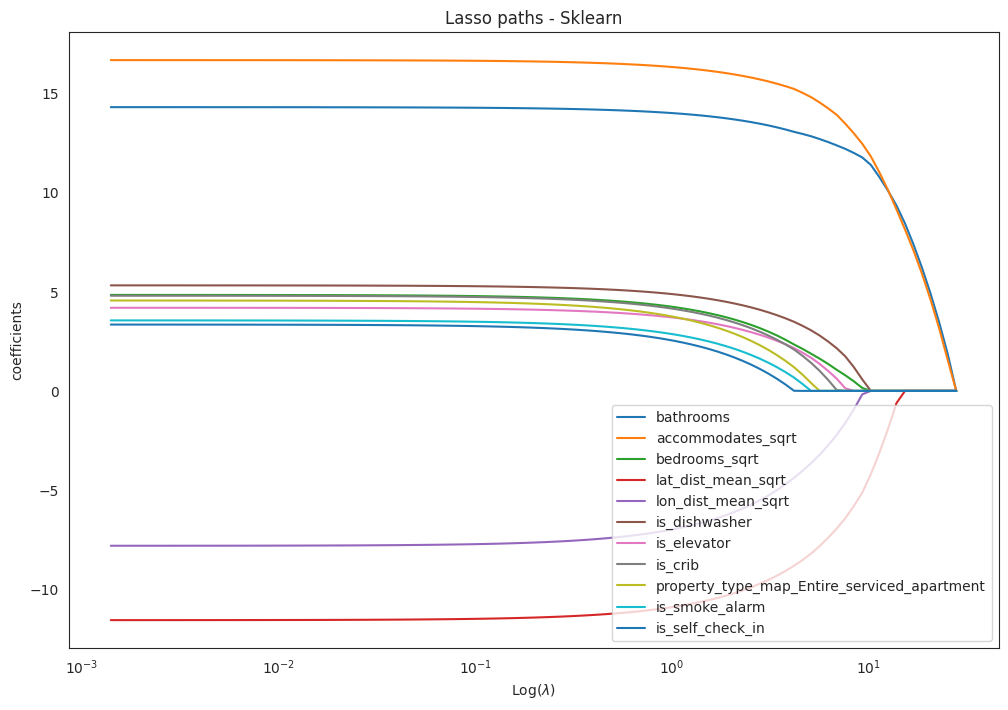

In [ ]:
# Lasso v2
sns.set_style("white")

# Pobierz wszystkie zmienne (włącznie z Intercept)
variables_used = model.model.exog_names
# Bez Intercept
variables_used = [var for var in model.model.exog_names if var != 'Intercept']

print(variables_used)

variables = variables_used

data_subset = data_encoded.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
# display(data_subset)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [ ]:
import plotly.graph_objects as go

# Istniejący kod do obliczenia lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=5e-5)

# Tworzenie interaktywnego wykresu
fig = go.Figure()

for i in range(X.shape[1]):
    fig.add_trace(go.Scatter(
        x=alphas_lasso,
        y=coefs_lasso[i],
        mode='lines',
        name=variables[i],
        hovertemplate='<b>%{fullData.name}</b><br>' +
                      'λ: %{x:.2e}<br>' +
                      'Coefficient: %{y:.4f}<extra></extra>'
    ))

fig.update_xaxes(type="log", title="Log(λ)")
fig.update_yaxes(title="Coefficients")
fig.update_layout(
    title="Lasso Paths - Interactive",
    height=800,
    width=1200,
    hovermode='closest',
    plot_bgcolor='white',      # Tło obszaru wykresu
    paper_bgcolor='white',     # Tło całego rysunku
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.01
    )
)

fig.show()

In [ ]:
# Dodaj podsumowanie dla log(λ) = 1 (czyli λ = e^1 ≈ 2.718)
target_lambda = np.e  # e^1 ≈ 2.718

# Znajdź najbliższy indeks dla λ = e
idx_closest = np.argmin(np.abs(alphas_lasso - target_lambda))
lambda_actual = alphas_lasso[idx_closest]

print("\n" + "="*70)
print(f"WSPÓŁCZYNNIKI LASSO DLA log(λ) ≈ 1 (λ = {lambda_actual:.4f})")
print("="*70)

# Stwórz DataFrame z współczynnikami
coefs_at_lambda = pd.DataFrame({
    'Variable': variables,
    'Coefficient': coefs_lasso[:, idx_closest]
})

# Sortuj po wartości bezwzględnej współczynnika
coefs_at_lambda['Abs_Coef'] = coefs_at_lambda['Coefficient'].abs()
coefs_at_lambda = coefs_at_lambda.sort_values('Abs_Coef', ascending=False)

# Wyświetl wszystkie zmienne
print(f"\nλ (lambda): {lambda_actual:.4f}")
print(f"log(λ): {np.log(lambda_actual):.4f}\n")
print(coefs_at_lambda[['Variable', 'Coefficient']].to_string(index=False))

# Statystyki
non_zero = (coefs_at_lambda['Coefficient'] != 0).sum()
print("\n" + "="*70)
print(f"Liczba niezerowych współczynników: {non_zero} / {len(variables)}")
print(f"Procent niezerowych: {non_zero/len(variables)*100:.1f}%")
print("="*70)


WSPÓŁCZYNNIKI LASSO DLA log(λ) ≈ 1 (λ = 2.8046)

λ (lambda): 2.8046
log(λ): 1.0313

                                   Variable  Coefficient
                          accommodates_sqrt    15.722727
                                  bathrooms    13.486831
                         lat_dist_mean_sqrt    -9.734567
                         lon_dist_mean_sqrt    -5.519881
                              is_dishwasher     4.094982
                              bedrooms_sqrt     3.168841
                                    is_crib     2.985087
                                is_elevator     2.831345
property_type_map_Entire_serviced_apartment     2.305935
                             is_smoke_alarm     1.625196
                           is_self_check_in     1.108433

Liczba niezerowych współczynników: 11 / 11
Procent niezerowych: 100.0%


In [ ]:
# # Lasso v1

# # variables = ['host_is_superhost', 'neighbourhood_cleansed', 'bathrooms', 'bedrooms', 'beds',
# variables = ['bathrooms', 'bedrooms', 'beds',
#              'accommodates', 'minimum_nights',
#              ] + ['is_wifi', 'is_tv', 'n_amenities']

# data_subset = data.loc[:, variables + ['price']]
# data_subset.dropna(inplace=True)
# # display(data_subset)

# X = data_subset.loc[:,variables]
# X = preprocessing.scale(X)
# y = np.array(data_subset.price)

# alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# # Display results
# plt.figure(figsize = (12,8))

# for i in range(X.shape[1]):
#     plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

# plt.xscale('log')
# plt.xlabel('Log($\\lambda$)')
# plt.ylabel('coefficients')
# plt.title('Lasso paths - Sklearn')
# plt.legend()
# plt.axis('tight')

# Analiza SHAP-a

nie ma ograniczeń ile wartości SHAP-a mogą wynosić.

Przy klasyfikacji - powinny sumować się do 1.

Guest_included - ile może być gości.

Bathrooms - może być korelacja z bedrooms.

### Google Drive connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load & Save

In [ ]:
import pickle
import os

X = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that smart stuff
Y = np.array(data_subset.price)

# Funkcja wrapper dla 3-krotnego logarytmu
def predict_original_scale(X):
    log3_predictions = model.predict(X)
    return np.exp(np.exp(np.exp(log3_predictions)))

# x=X.iloc[:100] ### wycinek danych
# y=Y[:100]
x=X
y=Y
force_restart = 0

# Prefix dla nazw plików i nazwy zmiennych
pre = 'predictions_Madrid_OLS'
expl = 'explainer'
shap_vals = 'shap_values'

# Ścieżka do Google Drive
SAVE_PATH = '/content/drive/MyDrive/shap_models/'

# Sprawdź czy pliki istnieją
files_exist = all([
    os.path.exists(f'{pre}_X_data.pkl'),
    os.path.exists(f'{pre}_{shap_vals}.pkl'),
    os.path.exists(f'{pre}_{expl}.pkl')
])

# Pełne ścieżki do plików
x_data_path = f'{SAVE_PATH}{pre}_X_data.pkl'
shap_vals_path = f'{SAVE_PATH}{pre}_{shap_vals}.pkl'
explainer_path = f'{SAVE_PATH}{pre}_{expl}.pkl'

# Sprawdź czy pliki istnieją
files_exist = all([
    os.path.exists(x_data_path),
    os.path.exists(shap_vals_path),
    os.path.exists(explainer_path)
])

# Logika: wczytaj tylko jeśli pliki istnieją & force_restart == 0
if files_exist and force_restart == 0:
    print("📂 Wczytywanie zapisanych danych SHAP z Google Drive...")

    with open(x_data_path, 'rb') as f:
        X = pickle.load(f)

    with open(shap_vals_path, 'rb') as f:
        shap_values = pickle.load(f)

    with open(explainer_path, 'rb') as f:
        explainer = pickle.load(f)

    print("✓ Dane SHAP wczytane pomyślnie z Google Drive!")

# Logika: licz ponownie jeśli force_restart == 1 lub brak plików
else:
    if force_restart == 1:
        print("🔄 force_restart=1 - Pomijam wczytywanie, tworzę model od nowa...")
    else:
        print("⚙️  Pliki SHAP nie znalezione. Tworzenie nowego modelu SHAP...")

    print("⏳ To może potrwać kilka minut...")

    ###############################
    # SHAP z funkcją wrapper
    explainer = shap.Explainer(predict_original_scale, X)
    shap_values = explainer(X)
    ###############################

    print("💾 Zapisywanie wyników do Google Drive...")

    # Zapisz wyniki do Google Drive
    with open(x_data_path, 'wb') as f:
        pickle.dump(x, f)

    with open(shap_vals_path, 'wb') as f:
        pickle.dump(shap_values, f)

    with open(explainer_path, 'wb') as f:
        pickle.dump(explainer, f)

    print(f"✓ Model SHAP utworzony i zapisany w {SAVE_PATH}!")

# Weryfikacja
print(f"\n📊 Kształt X: {x.shape}")
print(f"📊 Liczba obserwacji: {len(shap_values)}")

# Wyświetl rozmiary plików w Google Drive
print(f"\n📁 Pliki w {SAVE_PATH}:")
!ls -lh "{SAVE_PATH}"{pre}_*.pkl 2>/dev/null || echo "Pliki zapisane"

📂 Wczytywanie zapisanych danych SHAP z Google Drive...
✓ Dane SHAP wczytane pomyślnie z Google Drive!

📊 Kształt X: (11924, 11)
📊 Liczba obserwacji: 11924

📁 Pliki w /content/drive/MyDrive/shap_models/:
-rw------- 1 root root  19K Jan 14 20:19 /content/drive/MyDrive/shap_models/predictions_Madrid_OLS_explainer.pkl
-rw------- 1 root root 2.1M Jan 14 20:19 /content/drive/MyDrive/shap_models/predictions_Madrid_OLS_shap_values.pkl
-rw------- 1 root root 1.1M Jan 14 20:19 /content/drive/MyDrive/shap_models/predictions_Madrid_OLS_X_data.pkl


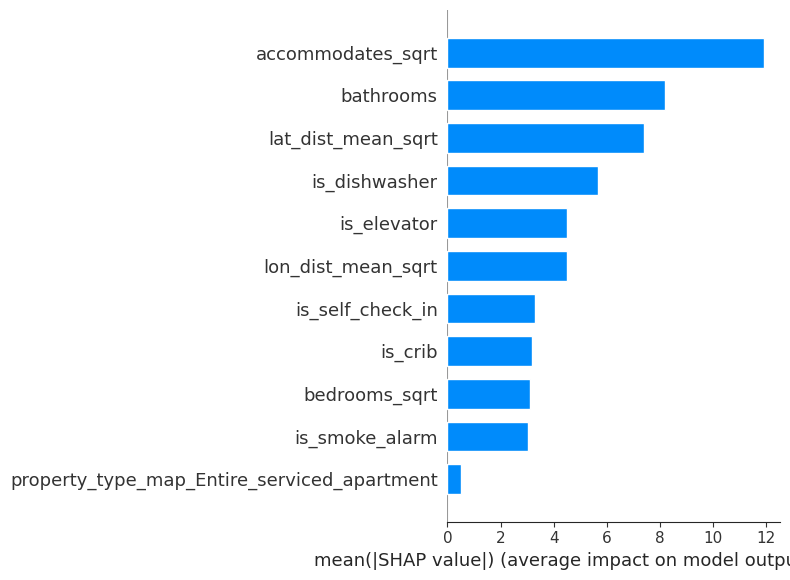

In [ ]:
shap.summary_plot(shap_values, x, plot_type="bar")

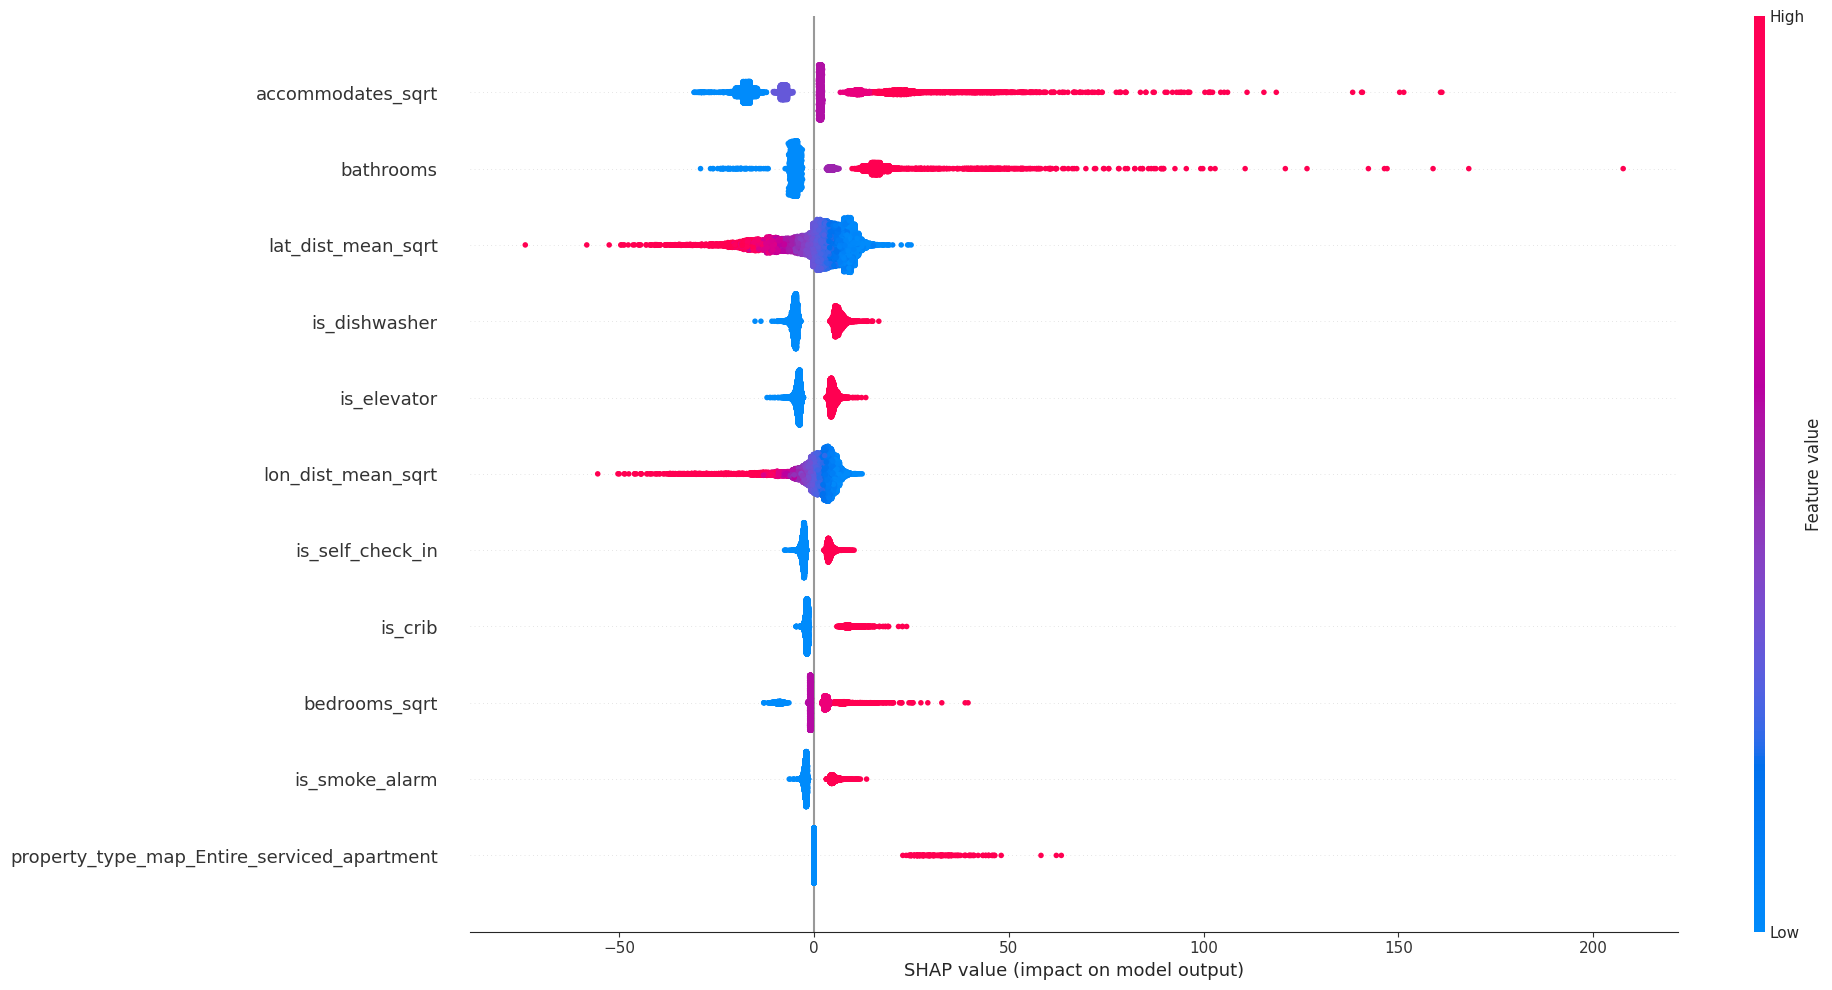

In [ ]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_values, features=x, feature_names=x.columns, plot_size=(20,10))

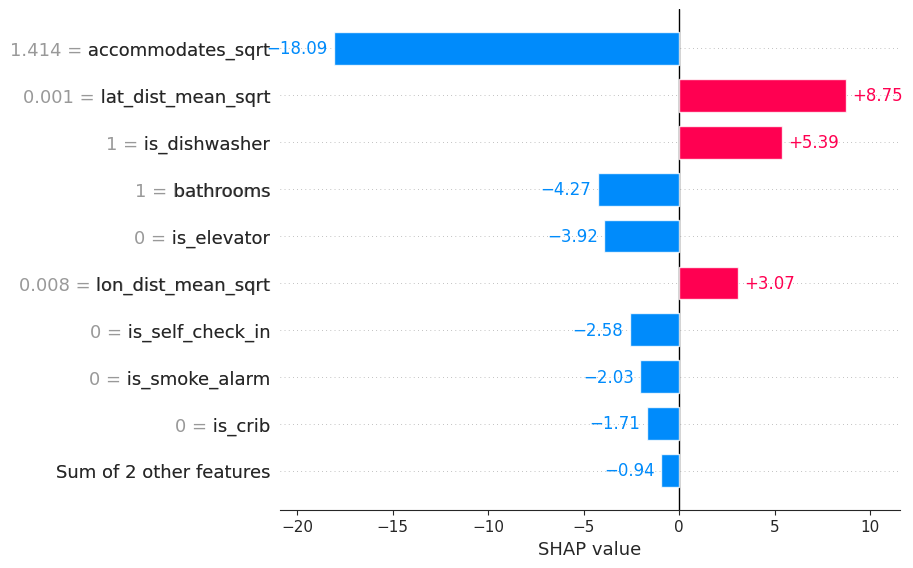

In [ ]:
shap.plots.bar(shap_values[0])

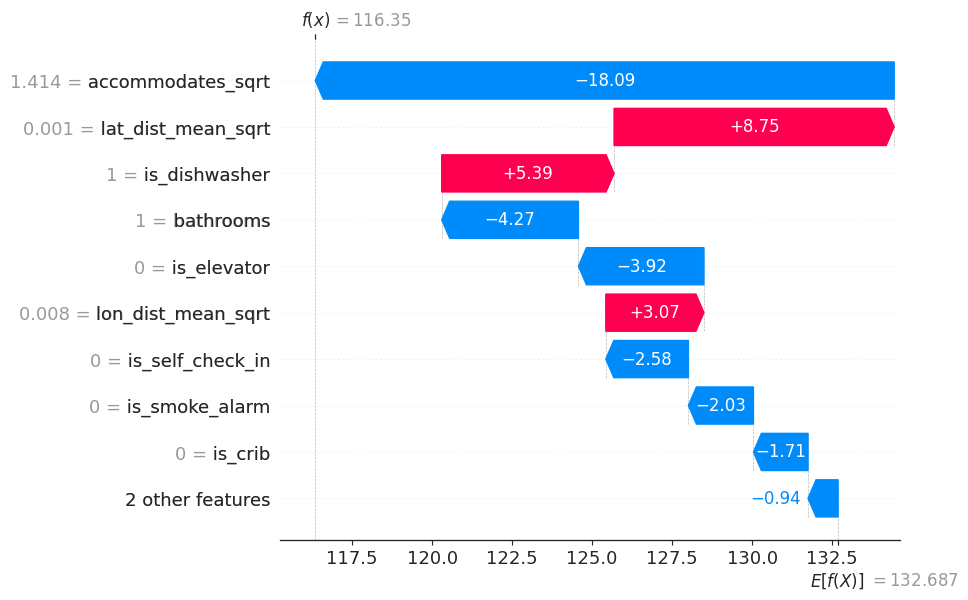

In [ ]:
shap.plots.waterfall(shap_values[0])

Najbardziej typowy przykład: indeks 3490
Predykcja: 136.13, Średnia: 136.12


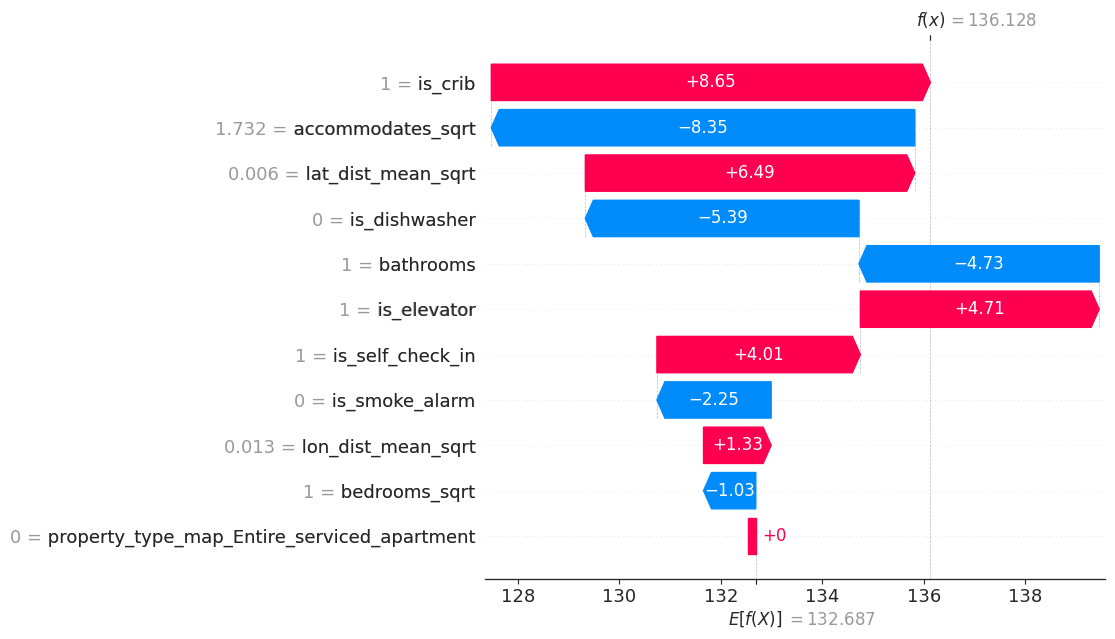

In [ ]:
# Oblicz predykcje dla najbardziej typowego przedstawiciela zbioru
# predictions = model.predict(x)

# Znajdź przykład najbliższy średniej predykcji
mean_prediction = predictions.mean()
idx_typical = np.abs(predictions - mean_prediction).argmin()  # argmin zamiast idxmin

print(f"Najbardziej typowy przykład: indeks {idx_typical}")
print(f"Predykcja: {predictions.iloc[idx_typical]:.2f}, Średnia: {mean_prediction:.2f}")

# Wyświetl SHAP dla tego przykładu
shap.plots.waterfall(shap_values[idx_typical], max_display=20)

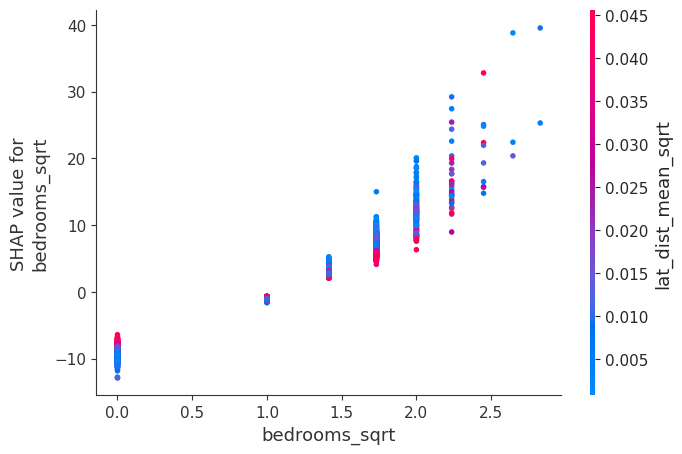

In [ ]:
# Wykres zależności dla wybranej zmiennej
variable_name = 'bedrooms_sqrt'

shap.dependence_plot(
    variable_name,
    shap_values.values,
    x,
    interaction_index='auto'  # Automatycznie znajdzie najsilniejszą interakcję
)

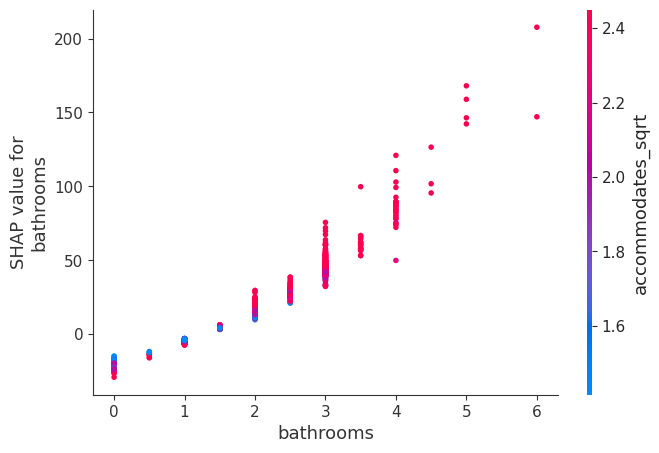

In [ ]:
# Wykres zależności dla wybranej zmiennej
variable_name = 'bathrooms'

shap.dependence_plot(
    variable_name,
    shap_values.values,
    x,
    interaction_index='auto'  # Automatycznie znajdzie najsilniejszą interakcję
)

### Single plot

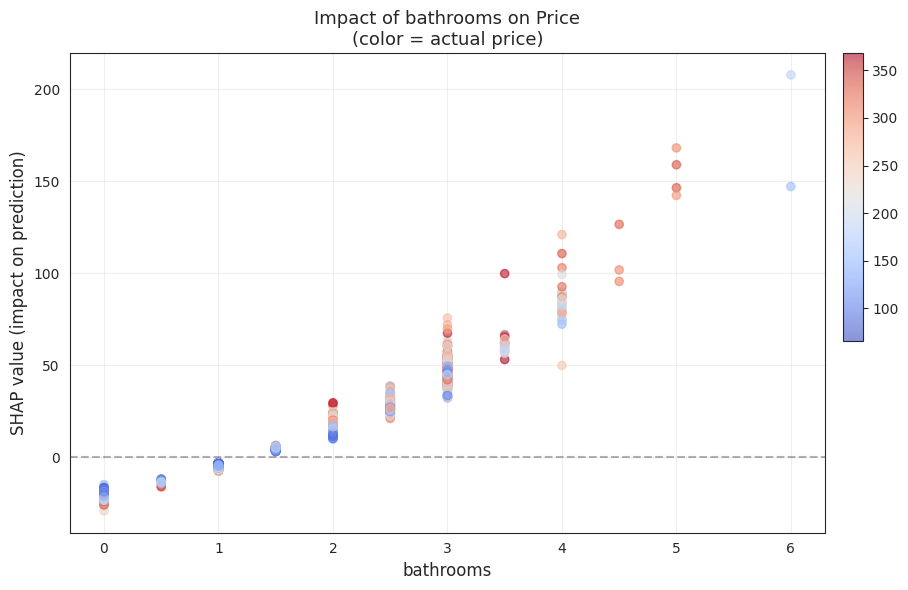

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))  # Dodaj rozmiar rysunku

variable_name = 'bathrooms'
variable_idx = list(x.columns).index(variable_name)

scatter = ax.scatter(  # Zmień axes na ax
    x[variable_name],
    shap_values.values[:, variable_idx],
    c=y,  # Kolor według rzeczywistej ceny
    cmap='coolwarm',
    alpha=0.6
)

# Colorbar - pionowy, zwężony, wyrównany do góry
cbar = fig.colorbar(
    scatter,
    orientation='vertical',
    pad=0.02,           # Odstęp od wykresu
    shrink=0.6,         # Wysokość: 60% wysokości wykresu
    aspect=15,          # Proporcje (wyższe = węższy)
    anchor=(0.0, 1.0)   # Wyrównanie do góry (1.0)
)
# cbar.ax.tick_params(labelsize=7)

# Zmień axes[i] na ax
ax.set_xlabel(variable_name, fontsize=12)
ax.set_ylabel('SHAP value (impact on prediction)', fontsize=12)
ax.set_title(f'Impact of {variable_name} on Price\n(color = actual price)', fontsize=13)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

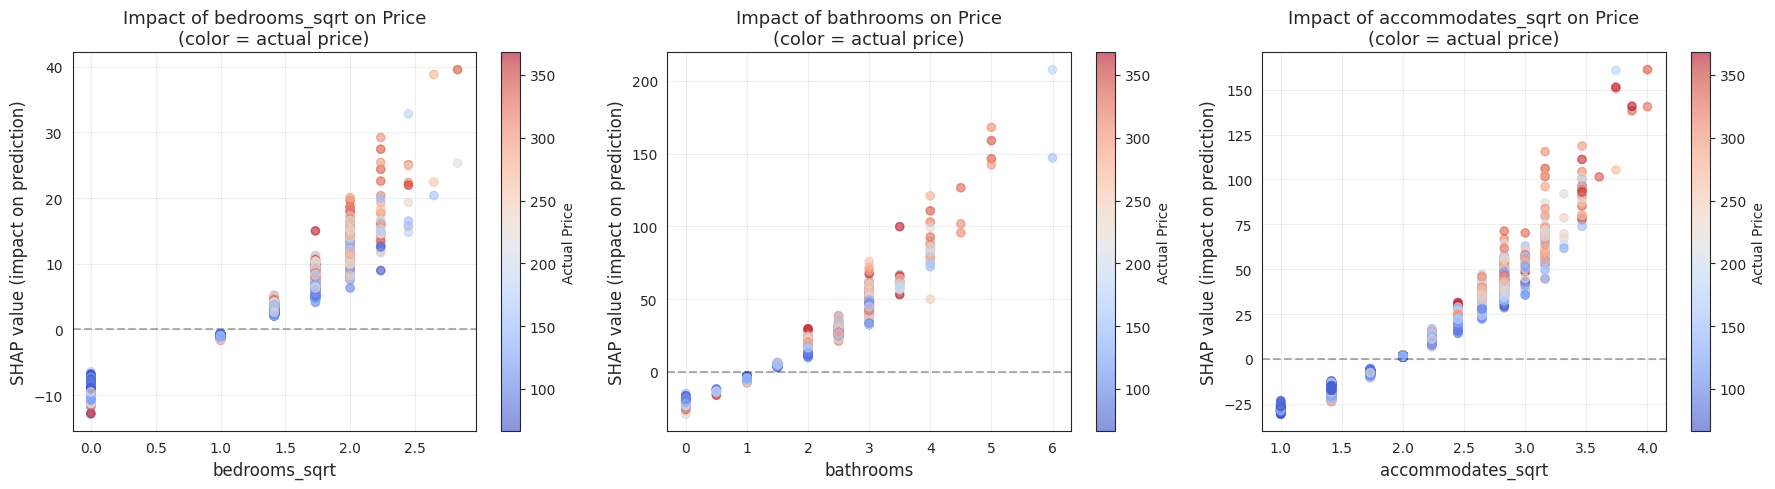

In [ ]:
import matplotlib.pyplot as plt

# Lista zmiennych do analizy
variables_to_plot = ['bedrooms_sqrt', 'bathrooms', 'accommodates_sqrt']

# Stwórz subplot dla każdej zmiennej
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Wykres na konkretnym subplot
    scatter = axes[i].scatter(
        x[variable_name],
        shap_values.values[:, variable_idx],
        c=y,  # Kolor według rzeczywistej ceny
        cmap='coolwarm',
        alpha=0.6
    )

    # Colorbar dla każdego wykresu
    plt.colorbar(scatter, ax=axes[i], label='Actual Price')

    axes[i].set_xlabel(variable_name, fontsize=12)
    axes[i].set_ylabel('SHAP value (impact on prediction)', fontsize=12)
    axes[i].set_title(f'Impact of {variable_name} on Price\n(color = actual price)', fontsize=13)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

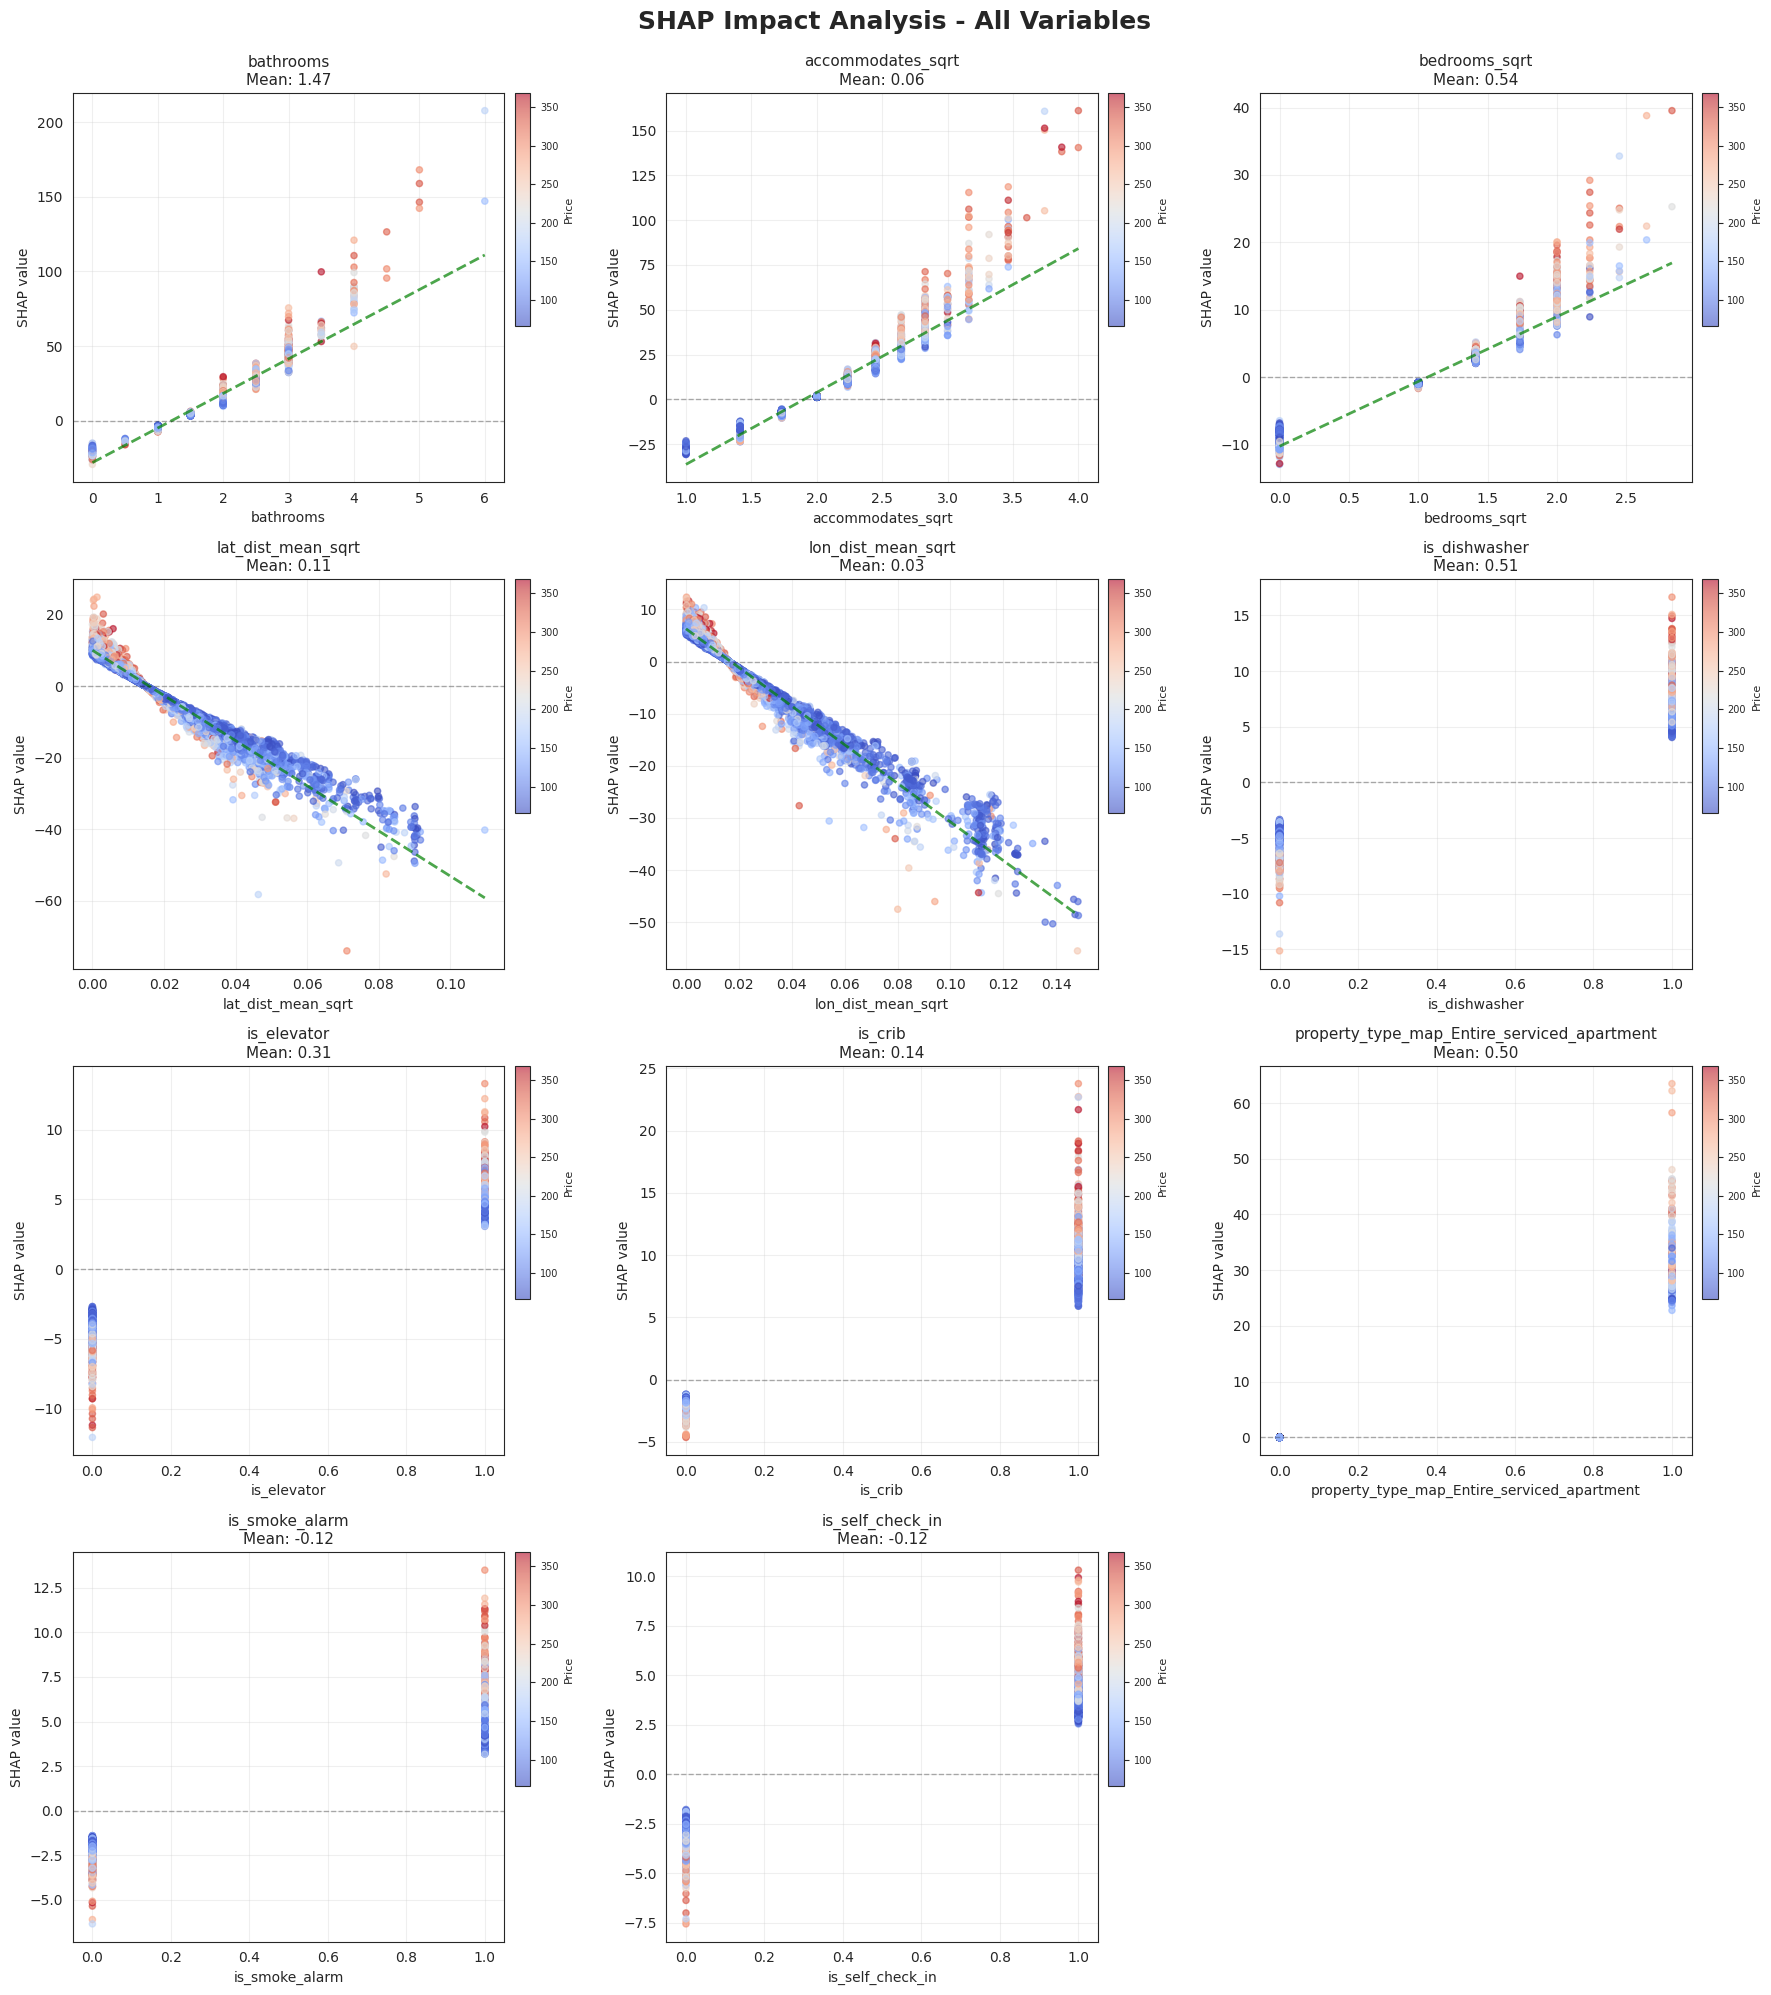

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variables_to_plot = variables_used

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]

    # Scatter plot
    scatter = axes[i].scatter(
        x_data,
        shap_data,
        c=y,
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar - pionowy, zwężony, wyrównany do góry
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,           # Odstęp od wykresu
        shrink=0.6,         # Wysokość: 60% wysokości wykresu
        aspect=15,          # Proporcje (wyższe = węższy)
        anchor=(0.0, 1.0)   # Wyrównanie do góry (1.0)
    )
    cbar.set_label('Price', fontsize=8)
    cbar.ax.tick_params(labelsize=7)

    # Linia trendu
    if len(np.unique(x_data)) > 2:
        try:
            z = np.polyfit(x_data, shap_data, 1)
            p = np.poly1d(z)
            x_sorted = np.sort(x_data)
            axes[i].plot(x_sorted, p(x_sorted), "g--", linewidth=2, alpha=0.7)
        except:
            pass

    # Formatowanie
    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('SHAP value', fontsize=10)
    axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
    axes[i].grid(True, alpha=0.3)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SHAP Impact Analysis - All Variables', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### Multiplot ALL

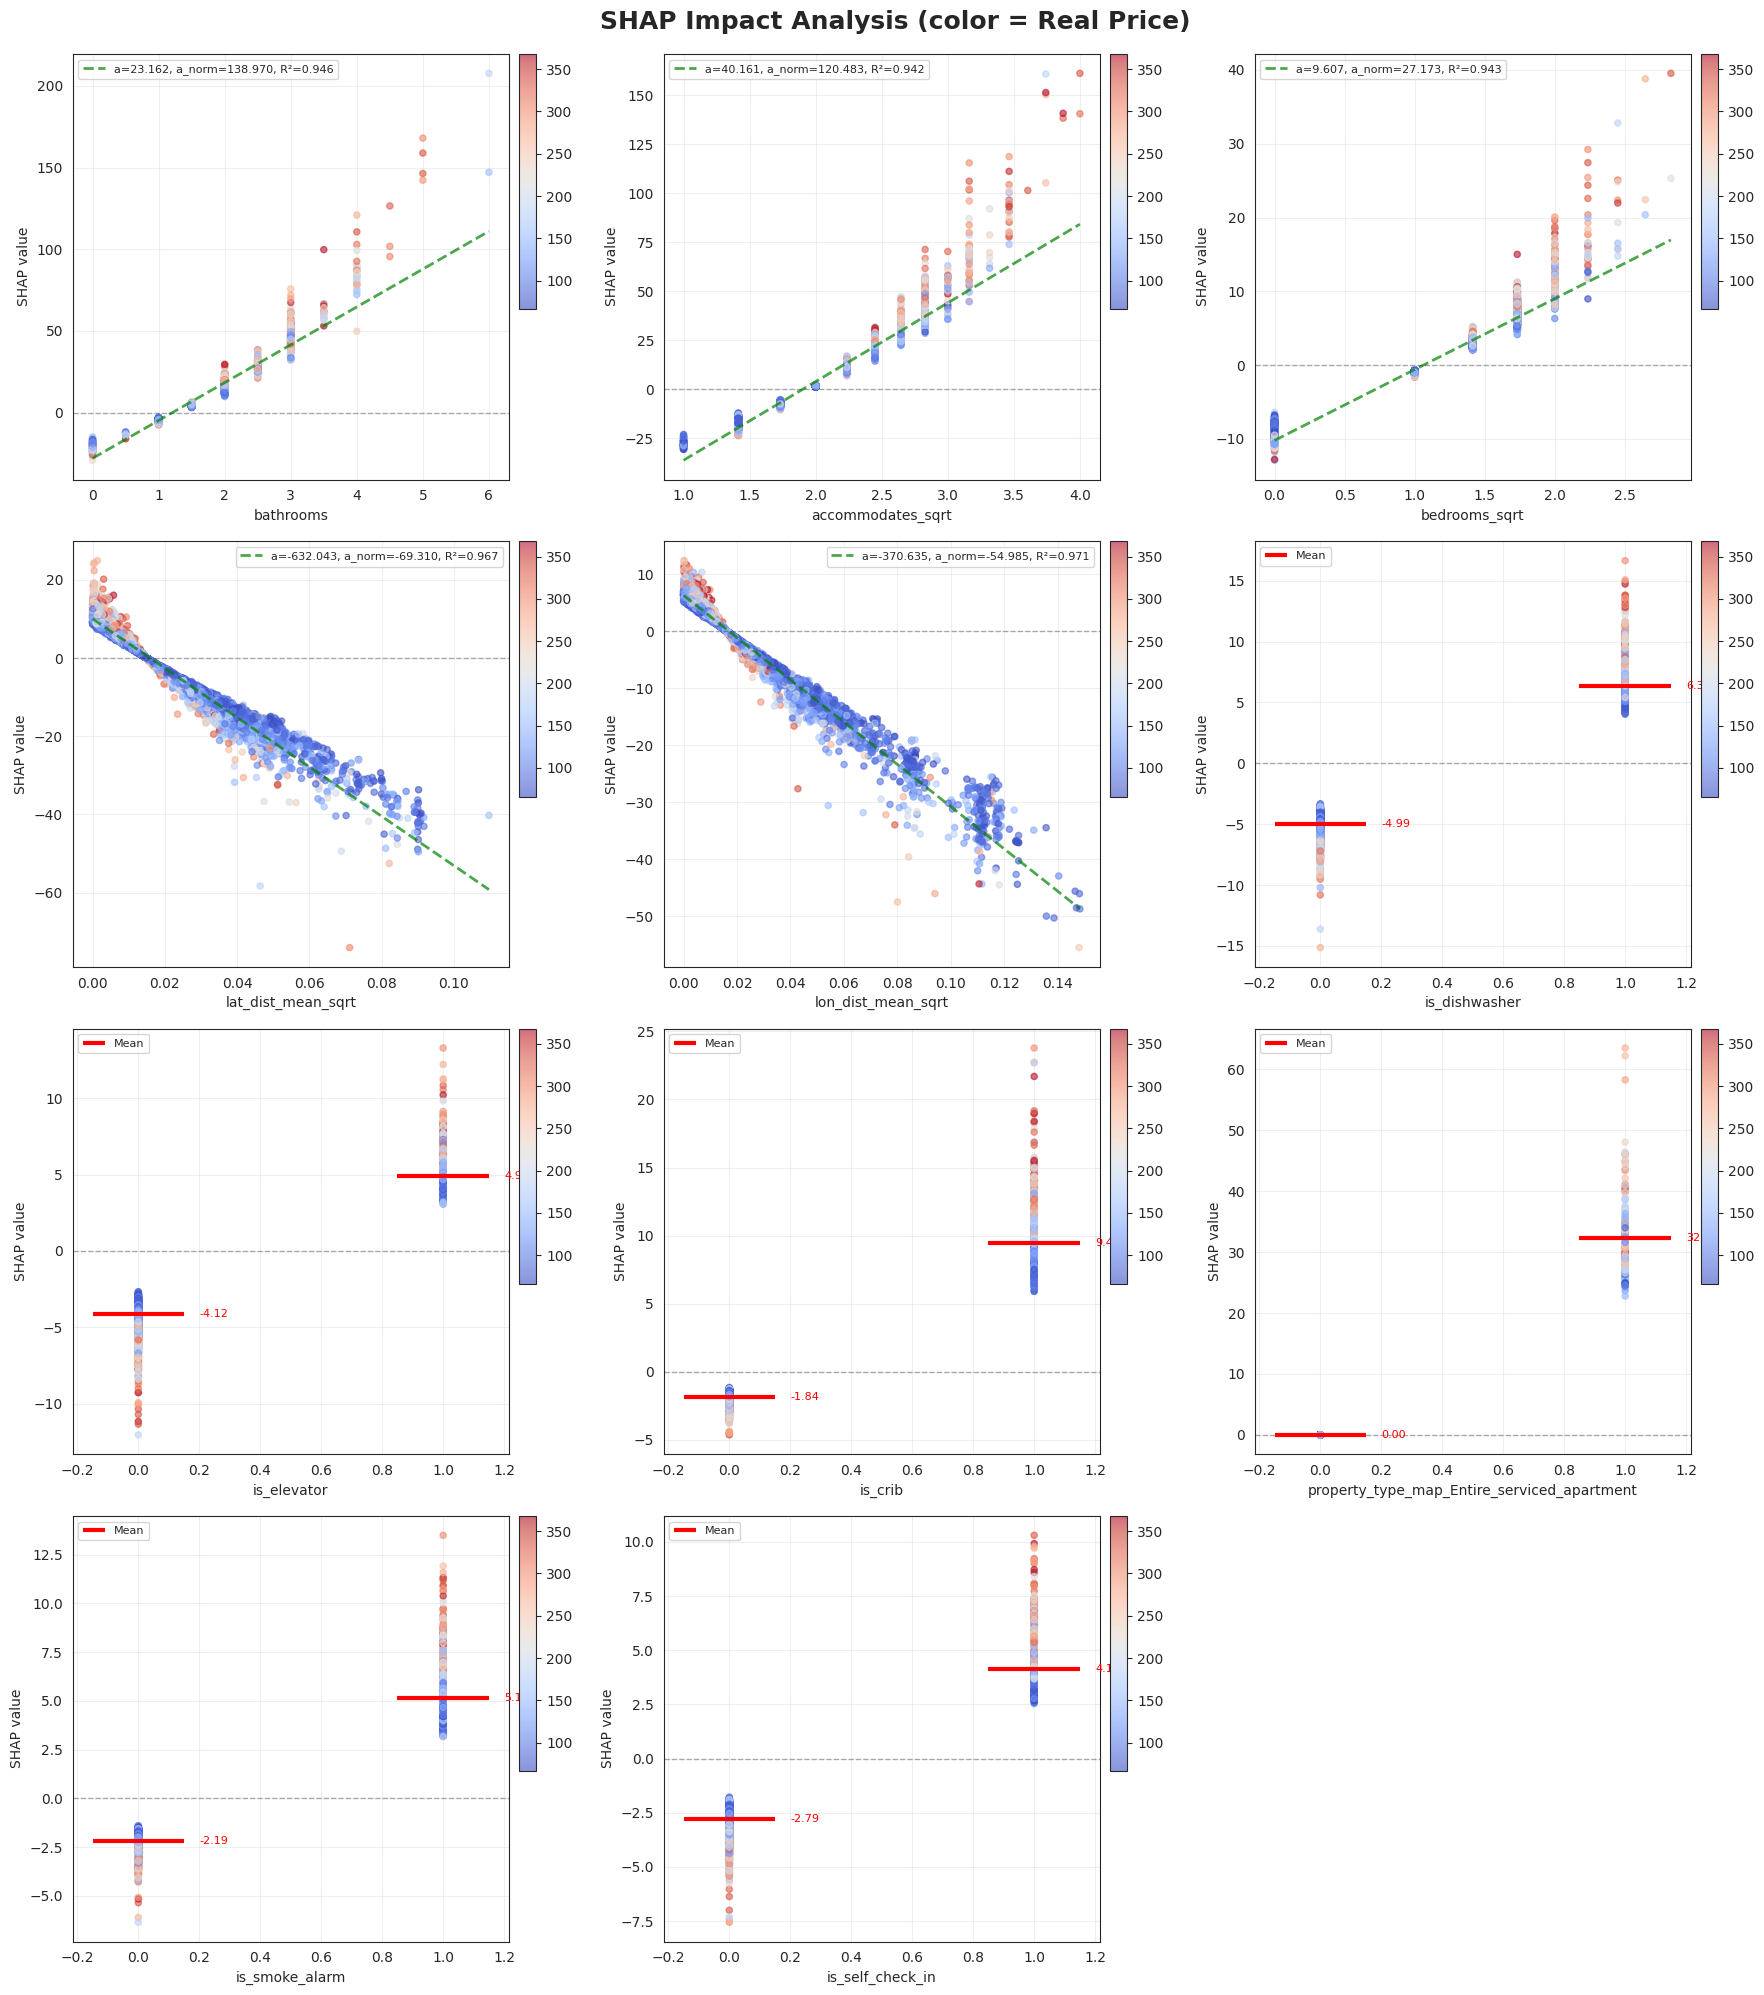


STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH (≤4 wartości)

is_dishwasher:
  is_dishwasher=0: SHAP=   -4.99 (n=6158)
  is_dishwasher=1: SHAP=    6.38 (n=5766)
  Różnica (1 vs 0):    11.37

is_elevator:
  is_elevator=0: SHAP=   -4.12 (n=6080)
  is_elevator=1: SHAP=    4.91 (n=5844)
  Różnica (1 vs 0):     9.03

is_crib:
  is_crib=0: SHAP=   -1.84 (n=9831)
  is_crib=1: SHAP=    9.45 (n=2093)
  Różnica (1 vs 0):    11.29

property_type_map_Entire_serviced_apartment:
  property_type_map_Entire_serviced_apartment=0: SHAP=    0.00 (n=11739)
  property_type_map_Entire_serviced_apartment=1: SHAP=   32.33 (n=185)
  Różnica (1 vs 0):    32.33

is_smoke_alarm:
  is_smoke_alarm=0: SHAP=   -2.19 (n=8555)
  is_smoke_alarm=1: SHAP=    5.13 (n=3369)
  Różnica (1 vs 0):     7.32

is_self_check_in:
  is_self_check_in=0: SHAP=   -2.79 (n=7317)
  is_self_check_in=1: SHAP=    4.11 (n=4607)
  Różnica (1 vs 0):     6.90

STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH (>4 wartości)

bathrooms:
  Nachylenie (a):                 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variables_to_plot = variables_used
n_unique_limit = 4

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]

    # Scatter plot
    scatter = axes[i].scatter(
        x_data,
        shap_data,
        c=y,
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,
        shrink=0.6,
        aspect=15,
        anchor=(0.0, 1.0)
    )

    # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
    unique_vals = np.unique(x_data)
    n_unique = len(unique_vals)

    if n_unique <= n_unique_limit:  # Zmienna dyskretna
        # Oblicz średnie SHAP dla każdej wartości
        for val in unique_vals:
            mask = x_data == val
            mean_shap = shap_data[mask].mean()

            # Pozioma linia pokazująca średnią
            axes[i].hlines(
                mean_shap,
                val - 0.15,
                val + 0.15,
                colors='red',
                linewidth=3,
                zorder=5,
                label='Mean' if val == unique_vals[0] else ''
            )

            # Tekst ze średnią
            axes[i].text(
                val + 0.2,
                mean_shap,
                f'{mean_shap:.2f}',
                fontsize=8,
                color='red',
                va='center'
            )
    else:  # Zmienna ciągła - linia trendu
        # try:
          # Regresja liniowa
          slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, shap_data)

          # Linia trendu
          x_sorted = np.sort(x_data)
          y_trend = slope * x_sorted + intercept

          # Znormalizowane nachylenie
          x_range = x_data.max() - x_data.min()
          slope_normalized = slope * x_range

          axes[i].plot(
              x_sorted,
              y_trend,
              "g--",
              linewidth=2,
              alpha=0.7,
              label=f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}'
          )

    #         # Dodaj nachylenie i R² do tytułu
    #         axes[i].set_title(
    #             f'{variable_name}\nMean: {shap_data.mean():.2f}, a={slope:.3f}',
    #             fontsize=11
    #         )
    #     except:
    #         axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)

    # # Formatowanie (jeśli zmienna dyskretna, tytuł bez nachylenia)
    # if n_unique <= n_unique_limit:
    #     axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)

    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('SHAP value', fontsize=10)
    axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
    axes[i].grid(True, alpha=0.3)

    # Legenda
    if n_unique <= n_unique_limit or n_unique > n_unique_limit:
        axes[i].legend(loc='best', fontsize=8)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SHAP Impact Analysis (color = Real Price)', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statystyki dla zmiennych dyskretnych
print("\n" + "="*80)
print(f"STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH (≤{n_unique_limit} wartości)")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    unique_vals = np.unique(x_data)

    if len(unique_vals) <= n_unique_limit:  # Dyskretna zmienna
        print(f"\n{variable_name}:")
        for val in unique_vals:
            mask = x_data == val
            mean_shap = shap_data[mask].mean()
            count = mask.sum()
            print(f"  {variable_name}={val}: SHAP={mean_shap:>8.2f} (n={count})")

        # Różnica między wartościami (dla binarnych)
        if len(unique_vals) == 2:
            diff = shap_data[x_data == unique_vals[1]].mean() - shap_data[x_data == unique_vals[0]].mean()
            print(f"  Różnica ({unique_vals[1]} vs {unique_vals[0]}): {diff:>8.2f}")

# Statystyki dla zmiennych ciągłych
print("\n" + "="*80)
print(f"STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH (>{n_unique_limit} wartości)")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    unique_vals = np.unique(x_data)

    if len(unique_vals) > n_unique_limit:  # Ciągła zmienna
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, shap_data)

            # Dodatkowe statystyki
            x_min = x_data.min()
            x_max = x_data.max()
            x_range = x_max - x_min

            # Znormalizowane nachylenie (wpływ przejścia przez cały zakres)
            slope_normalized = slope * x_range

            print(f"\n{variable_name}:")
            print(f"  Nachylenie (a):              {slope:>10.4f}")
            print(f"  Przecięcie (b):              {intercept:>10.4f}")
            print(f"  R²:                          {r_value**2:>10.4f}")
            print(f"  Znormalizowane (a×range):    {slope_normalized:>10.4f}")
            print(f"  p-value:                     {p_value:>10.4e}")
            print(f"  Std error:                   {std_err:>10.4f}")
            print(f"  Feature min:                 {x_min:>10.4f}")
            print(f"  Feature max:                 {x_max:>10.4f}")
            print(f"  Feature range:               {x_range:>10.4f}")
            print(f"  Interpretacja:")
            print(f"    - 1 jednostka wzrostu → {slope:.4f} zmiana SHAP")
            print(f"    - Przejście min→max → {slope_normalized:.4f} zmiana SHAP")
            print(f"  ---------------------------------------")
        except:
            print(f"\n{variable_name}: Błąd w obliczeniu regresji")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# variables_to_plot = variables_used

# # 3 kolumny
# n_cols = 3
# n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
# axes = axes.flatten()

# for i, variable_name in enumerate(variables_to_plot):
#     variable_idx = list(x.columns).index(variable_name)

#     # Dane do wykresu
#     x_data = x[variable_name]
#     shap_data = shap_values.values[:, variable_idx]

#     # Scatter plot
#     scatter = axes[i].scatter(
#         x_data,
#         shap_data,
#         c=y,
#         cmap='coolwarm',
#         alpha=0.6,
#         s=20
#     )

#     # Colorbar
#     cbar = fig.colorbar(
#         scatter,
#         ax=axes[i],
#         orientation='vertical',
#         pad=0.02,
#         shrink=0.6,
#         aspect=15,
#         anchor=(0.0, 1.0)
#     )
#     # cbar.set_label('Price', fontsize=8)
#     # cbar.ax.tick_params(labelsize=7)

#     # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
#     unique_vals = np.unique(x_data)
#     n_unique = len(unique_vals)

#     if n_unique <= 10:  # Zmienna dyskretna
#         # Oblicz średnie SHAP dla każdej wartości
#         for val in unique_vals:
#             mask = x_data == val
#             mean_shap = shap_data[mask].mean()

#             # Pozioma linia pokazująca średnią
#             axes[i].hlines(
#                 mean_shap,
#                 val - 0.15,
#                 val + 0.15,
#                 colors='red',
#                 linewidth=3,
#                 zorder=5,
#                 label='Mean' if val == unique_vals[0] else ''
#             )

#             # Opcjonalnie: tekst ze średnią
#             axes[i].text(
#                 val + 0.2,
#                 mean_shap,
#                 f'{mean_shap:.2f}',
#                 fontsize=8,
#                 color='red',
#                 va='center'
#             )
#     else:  # Zmienna ciągła - linia trendu
#         try:
#             z = np.polyfit(x_data, shap_data, 1)
#             p = np.poly1d(z)
#             x_sorted = np.sort(x_data)
#             axes[i].plot(
#                 x_sorted,
#                 p(x_sorted),
#                 "g--",
#                 linewidth=2,
#                 alpha=0.7,
#                 label='Trend'
#             )
#         except:
#             pass

#     # Formatowanie
#     axes[i].set_xlabel(variable_name, fontsize=10)
#     axes[i].set_ylabel('SHAP value', fontsize=10)
#     axes[i].set_title(f'{variable_name}\nMean: {shap_data.mean():.2f}', fontsize=11)
#     axes[i].axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)
#     axes[i].grid(True, alpha=0.3)

#     # Legenda tylko jeśli są czerwone linie
#     if n_unique <= 10:
#         axes[i].legend(loc='best', fontsize=8)

# # Usuń puste subplots
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.suptitle('SHAP Impact Analysis - All Variables', fontsize=18, fontweight='bold', y=0.995)
# plt.tight_layout()
# plt.show()

# # Statystyki dla zmiennych dyskretnych
# print("\n" + "="*80)
# print("STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH (0/1)")
# print("="*80)

# for variable_name in variables_to_plot:
#     variable_idx = list(x.columns).index(variable_name)
#     x_data = x[variable_name]
#     shap_data = shap_values.values[:, variable_idx]
#     unique_vals = np.unique(x_data)

#     if len(unique_vals) <= 2:  # Binarna zmienna
#         print(f"\n{variable_name}:")
#         for val in unique_vals:
#             mask = x_data == val
#             mean_shap = shap_data[mask].mean()
#             count = mask.sum()
#             print(f"  {variable_name}={val}: SHAP={mean_shap:>8.2f} (n={count})")

#         # Różnica między 1 a 0
#         if len(unique_vals) == 2:
#             diff = shap_data[x_data == 1].mean() - shap_data[x_data == 0].mean()
#             print(f"  Różnica (1 vs 0): {diff:>8.2f}")

### Multiplot ALL - Reversed

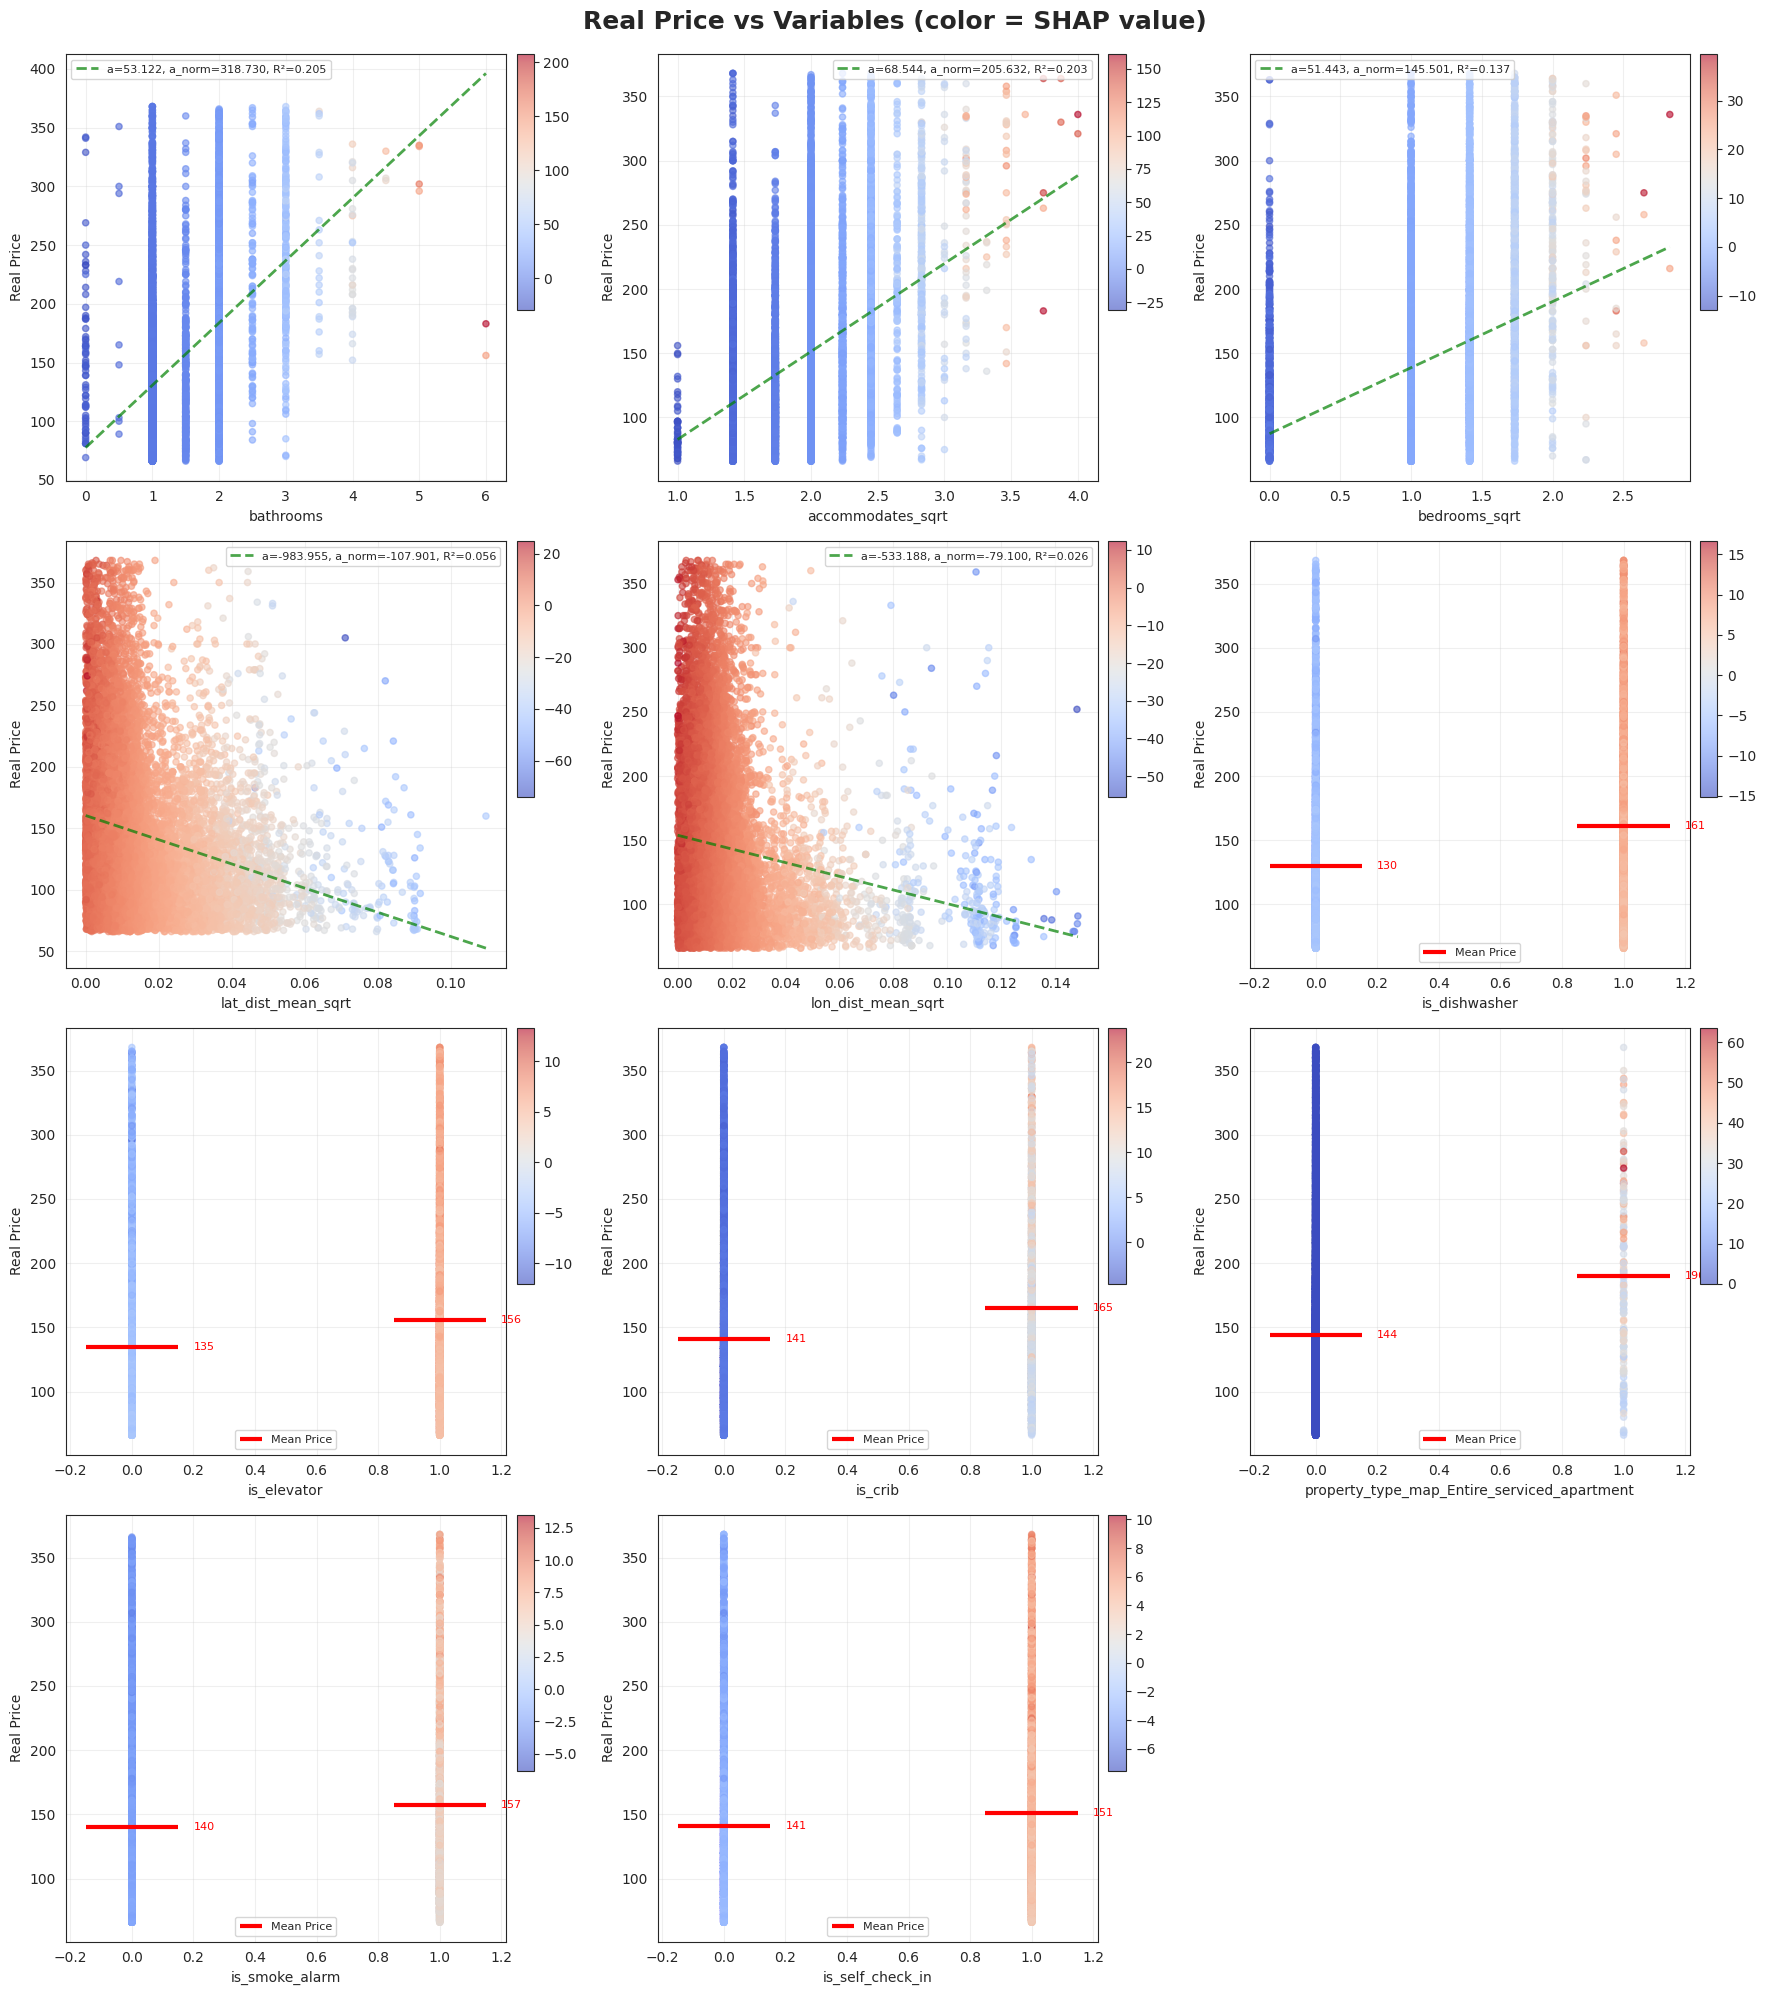


STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH - REAL PRICE

is_dishwasher:
  is_dishwasher=0: Mean Price=     130 (n=6158)
  is_dishwasher=1: Mean Price=     161 (n=5766)
  Różnica cen (1 vs 0):       31

is_elevator:
  is_elevator=0: Mean Price=     135 (n=6080)
  is_elevator=1: Mean Price=     156 (n=5844)
  Różnica cen (1 vs 0):       21

is_crib:
  is_crib=0: Mean Price=     141 (n=9831)
  is_crib=1: Mean Price=     165 (n=2093)
  Różnica cen (1 vs 0):       25

property_type_map_Entire_serviced_apartment:
  property_type_map_Entire_serviced_apartment=0: Mean Price=     144 (n=11739)
  property_type_map_Entire_serviced_apartment=1: Mean Price=     190 (n=185)
  Różnica cen (1 vs 0):       45

is_smoke_alarm:
  is_smoke_alarm=0: Mean Price=     140 (n=8555)
  is_smoke_alarm=1: Mean Price=     157 (n=3369)
  Różnica cen (1 vs 0):       17

is_self_check_in:
  is_self_check_in=0: Mean Price=     141 (n=7317)
  is_self_check_in=1: Mean Price=     151 (n=4607)
  Różnica cen (1 vs 0):       10



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variables_to_plot = variables_used
n_unique_limit = 4

# 3 kolumny
n_cols = 3
n_rows = int(np.ceil(len(variables_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, variable_name in enumerate(variables_to_plot):
    variable_idx = list(x.columns).index(variable_name)

    # Dane do wykresu
    x_data = x[variable_name]
    shap_data = shap_values.values[:, variable_idx]
    y_data = y  # Real price

    # Scatter plot - ODWRÓCONY: oś Y = Real Price, kolor = SHAP
    scatter = axes[i].scatter(
        x_data,           # x: zmienna
        y_data,           # y: Real Price (było: shap_data)
        c=shap_data,      # kolor: SHAP value (było: y)
        cmap='coolwarm',
        alpha=0.6,
        s=20
    )

    # Colorbar
    cbar = fig.colorbar(
        scatter,
        ax=axes[i],
        orientation='vertical',
        pad=0.02,
        shrink=0.6,
        aspect=15,
        anchor=(0.0, 1.0)
    )
    # cbar.set_label('SHAP value', fontsize=8)
    # cbar.ax.tick_params(labelsize=7)

    # Sprawdź czy zmienna dyskretna (mało unikalnych wartości)
    unique_vals = np.unique(x_data)
    n_unique = len(unique_vals)

    if n_unique <= n_unique_limit:  # Zmienna dyskretna
        # Oblicz średnie Real Price dla każdej wartości
        for val in unique_vals:
            mask = x_data == val
            mean_price = y_data[mask].mean()

            # Pozioma linia pokazująca średnią cenę
            axes[i].hlines(
                mean_price,
                val - 0.15,
                val + 0.15,
                colors='red',
                linewidth=3,
                zorder=5,
                label='Mean Price' if val == unique_vals[0] else ''
            )

            # Tekst ze średnią
            axes[i].text(
                val + 0.2,
                mean_price,
                f'{mean_price:.0f}',
                fontsize=8,
                color='red',
                va='center'
            )
    else:  # Zmienna ciągła - linia trendu
        # try:
          # Regresja liniowa: Real Price vs zmienna
          slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

          # Linia trendu
          x_sorted = np.sort(x_data)
          y_trend = slope * x_sorted + intercept

          # Znormalizowane nachylenie
          x_range = x_data.max() - x_data.min()
          slope_normalized = slope * x_range

          axes[i].plot(
              x_sorted,
              y_trend,
              "g--",
              linewidth=2,
              alpha=0.7,
              label=f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}'
          )

          # # Dodaj nachylenie i R² do tytułu
          # axes[i].set_title(
          #     f'f'a={slope:.3f}, a_norm={slope_normalized:.3f}, R²={r_value**2:.3f}',
          #     fontsize=11
          # )
        # except:
        #     axes[i].set_title(f'{variable_name}\nMean Price: {y_data.mean():.0f}', fontsize=11)

    # # Formatowanie (jeśli zmienna dyskretna, tytuł bez nachylenia)
    # if n_unique <= n_unique_limit:
    #     axes[i].set_title(f'{variable_name}\nMean Price: {y_data.mean():.0f}', fontsize=11)

    axes[i].set_xlabel(variable_name, fontsize=10)
    axes[i].set_ylabel('Real Price', fontsize=10)  # ZMIENIONE
    axes[i].grid(True, alpha=0.3)

    # Legenda
    if n_unique <= n_unique_limit or n_unique > n_unique_limit:
        axes[i].legend(loc='best', fontsize=8)

# Usuń puste subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Real Price vs Variables (color = SHAP value)', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statystyki dla zmiennych dyskretnych
print("\n" + "="*80)
print("STATYSTYKI DLA ZMIENNYCH DYSKRETNYCH - REAL PRICE")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    y_data = y
    unique_vals = np.unique(x_data)

    if len(unique_vals) <= n_unique_limit:
        print(f"\n{variable_name}:")
        for val in unique_vals:
            mask = x_data == val
            mean_price = y_data[mask].mean()
            count = mask.sum()
            print(f"  {variable_name}={val}: Mean Price={mean_price:>8.0f} (n={count})")

        # Różnica w cenach
        if len(unique_vals) == 2:
            diff = y_data[x_data == unique_vals[1]].mean() - y_data[x_data == unique_vals[0]].mean()
            print(f"  Różnica cen ({unique_vals[1]} vs {unique_vals[0]}): {diff:>8.0f}")

# Statystyki dla zmiennych ciągłych
print("\n" + "="*80)
print("STATYSTYKI DLA ZMIENNYCH CIĄGŁYCH - REAL PRICE vs VARIABLE")
print("="*80)

for variable_name in variables_to_plot:
    variable_idx = list(x.columns).index(variable_name)
    x_data = x[variable_name]
    y_data = y
    unique_vals = np.unique(x_data)

    if len(unique_vals) > n_unique_limit:  # Ciągła zmienna
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

            # Dodatkowe statystyki
            x_min = x_data.min()
            x_max = x_data.max()
            x_range = x_max - x_min

            # Znormalizowane nachylenie (wpływ przejścia przez cały zakres)
            slope_normalized = slope * x_range

            print(f"\n{variable_name}:")
            print(f"  Nachylenie (a):              {slope:>10.4f}")
            print(f"  Przecięcie (b):              {intercept:>10.4f}")
            print(f"  R²:                          {r_value**2:>10.4f}")
            print(f"  Znormalizowane (a×range):    {slope_normalized:>10.4f}")
            print(f"  p-value:                     {p_value:>10.4e}")
            print(f"  Std error:                   {std_err:>10.4f}")
            print(f"  Feature min:                 {x_min:>10.4f}")
            print(f"  Feature max:                 {x_max:>10.4f}")
            print(f"  Feature range:               {x_range:>10.4f}")
            print(f"  Interpretacja:")
            print(f"    - 1 jednostka wzrostu → {slope:.4f} EUR zmiana ceny")
            print(f"    - Przejście min→max → {slope_normalized:.4f} EUR zmiana ceny")
            print(f"  ---------------------------------------")
        except:
            print(f"\n{variable_name}: Błąd w obliczeniu regresji")